# Introducción

A lo largo de este proyecto, utilizaremos el dataset entregado por el profesor para realizar nuestro análisis de los datos de algunas de las redes sociales más famosas, con el objetivo de sacar conclusiones para mejorar nuestra **RED SOCIAL**.

# 1. Importación de librerías y carga del dataset

En primer lugar, importaremos las librerías que emplearemos en el proyecto, además de cargar el ya comentado dataset.

In [7859]:
# Importamos las librerías
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns

# Cargamos el dataset de las redes sociales
redSocialOriginal = pd.read_csv('Social Media Engagement Dataset.csv')

print(f"Dataset cargado: {redSocialOriginal.shape}")

Dataset cargado: (12000, 28)


# 2. Primer vistazo al dataset

En segundo lugar, vamos mostrar el dataset por encima para ver qué registros y columnas encontramos.

In [7860]:
# Mostramos las primeras filas
redSocialOriginal.head()

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8


In [7861]:
# Mostramos el nombre de las columnas
redSocialOriginal.columns

Index(['post_id', 'timestamp', 'day_of_week', 'platform', 'user_id',
       'location', 'language', 'text_content', 'hashtags', 'mentions',
       'keywords', 'topic_category', 'sentiment_score', 'sentiment_label',
       'emotion_type', 'toxicity_score', 'likes_count', 'shares_count',
       'comments_count', 'impressions', 'engagement_rate', 'brand_name',
       'product_name', 'campaign_name', 'campaign_phase',
       'user_past_sentiment_avg', 'user_engagement_growth',
       'buzz_change_rate'],
      dtype='object')

In [7862]:
# Mostramos información del conjunto de datos
redSocialOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [7863]:
# Mostramos la descripción de los datos
redSocialOriginal.describe()

,sentiment_score,toxicity_score,likes_count,shares_count,comments_count,impressions,engagement_rate,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.000553,0.503868,2490.72025,1007.167167,504.34575,49811.338500,0.278137,0.001472,0.000998,0.729692
std,0.583563,0.288198,1441.53253,575.072282,288.68416,28930.289451,1.149206,0.576627,0.289940,57.787219
min,-0.999800,0.000000,0.00000,0.000000,0.00000,130.000000,0.001880,-0.999600,-0.499900,-99.900000
25%,-0.503200,0.251400,1236.00000,510.000000,253.00000,24716.500000,0.049100,-0.495975,-0.248400,-48.700000
50%,-0.006200,0.505950,2496.00000,1018.000000,503.00000,49674.000000,0.080605,0.001950,0.002800,0.900000
75%,0.513525,0.756200,3723.25000,1501.000000,755.00000,74815.000000,0.163123,0.501725,0.250700,50.100000
max,0.999900,0.999900,5000.00000,2000.000000,1000.00000,99997.000000,32.211710,0.999400,0.499900,99.900000


# 3. Preprocesamiento

Seguidamente, vamos a realizarle un par de modificaciones previas al dataset para obtener más y mejores resultados.

#### 3.1 Copia

Crearemos una copia del dataset original para evitar dañarlo.

In [7864]:
redSocial = redSocialOriginal.copy()

#### 3.2 Columnas innecesarias

Vamos a eliminar algunas columnas que hemos considerado innecesarias.

In [7865]:
redSocial = redSocial.drop(columns=["post_id"])
# Es el id técnico, el cual no es necesario pues ya tenemos el propio id generado por Python

redSocial = redSocial.drop(columns=["user_id"])
# Como no vamos a hacer análisis a nivel usuario, sino a nivel general, tampoco necesitamos este id, nos interesa el crecimiento de la web y no el de los usuarios

redSocial = redSocial.drop(columns=["user_past_sentiment_avg"])
redSocial = redSocial.drop(columns=["user_engagement_growth"])
# Como hemos dicho antes, no vamos realizar análisis a nivel usuario

redSocial = redSocial.drop(columns=["hashtags"])
# Viendo un poco el dataset nos hemos percatado de que los hashtags pueden ser muy subjetivos, el mismo hashtag puede significar varias cosas dependiendo del contexto, 
# por lo que sería muy complejo su análisis

redSocial = redSocial.drop(columns=["keywords"])
# Similar a los hashtags, hemos decidido eliminar también esta columna, pues prácticamente todas las publicaciones tienen una palabra clave diferente
# y sería muy díficil sacarles valor

redSocial = redSocial.drop(columns=["buzz_change_rate"])
# También consideramos prescindible el uso de esta columna, pues al final el impacto viral no son más que modas que van y vienen, 
# lo que ahora es popular en un mes puede no serlo, y como somos una empresa pequeña consideramos que en el inicio del lanzamiento es mejor tirar a lo seguro

redSocial = redSocial.drop(columns=["sentiment_score"])
redSocial = redSocial.drop(columns=["sentiment_label"])
# Consideramos redundante su uso, pues con la columna de toxicidad podemos hacernos a la idea de si el post es positivo o negativo

redSocial = redSocial.drop(columns=["campaign_phase"])
# Tampoco vemos necesario conocer en qué fase de la campaña ronda una publicación, con saber a qué campaña pertenece suficiente

#### 3.3 Renombrar columnas

Renombramos todas las columnas al español para mejor comprensión.

In [7866]:
redSocial = redSocial.rename(columns={
    "likes_count": "likes",
    "text_content": "contenido_texto",
    "platform": "plataforma",
    "timestamp": "fecha",
    "day_of_week": "dia_semana",
    "mentions": "menciones",
    "impressions": "visualizaciones",
    "engagement_rate": "tasa_compromiso",
    "toxicity_score": "toxicidad",
    "brand_name": "nombre_marca",
    "product_name": "nombre_producto",
    "campaign_name": "nombre_campania",
    "location": "ubicacion",
    "comments_count": "comentarios",
    "language": "idioma",
    "shares_count": "compartidos",
    "emotion_type": "emocion",
    "topic_category": "categoria_tema",
})

#### 3.4 Creación de nuevas columnas

Ahora vamos a crear nuevas columnas a partir de las que ya tenemos para obtener resultados más específicos.

##### 3.4.1 Columnas derivadas de fecha

En primer lugar, crearemos columnas para analizar diferentes periodos de tiempo.

In [7867]:
# Primero, convertimos la columna de fecha a tipo datetime
redSocial["fecha"] = pd.to_datetime(redSocial["fecha"])

# Ahora, cogemos sus componentes para convertirlos en nuevas columnas, que nos servirán para análisis temporales más concretos
redSocial["anio"] = redSocial["fecha"].dt.year
redSocial["mes"] = redSocial["fecha"].dt.month
redSocial["dia"] = redSocial["fecha"].dt.day
redSocial["hora"] = redSocial["fecha"].dt.hour
redSocial["nombre_mes"] = redSocial["fecha"].dt.month_name()

# Definimos las franjas horarias
# Madrugada: 0-5, Mañana: 6-11, Tarde: 12-17, Noche: 18-23
bins = [0, 5, 11, 17, 23]
labels = ["Madrugada", "Mañana", "Tarde", "Noche"]

# Creamos la columna con las franjas horarias
redSocial["franja_horaria"] = pd.cut(redSocial["hora"], bins=bins, labels=labels, include_lowest=True, right=True) 
# Tomamos la columna de hora y agrupamos los bins que hemos definido a sus respectivos labels
# include_lowest y right en True para que se incluyan los extremos de los bins

# Definimos el orden de los días, para gráficos de los días de la semana
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# No es una columna pero nos servirá para gráficos de evolución semanal

##### 3.4.2 Columna de interacciones totales

La siguiente columna nos servirá para realizar comparaciones con las visualizaciones en las publicaciones.

In [7868]:
# Sumamos las columnas de likes, compartidos y comentarios y las juntamos en la columna de interacciones
redSocial["interacciones_totales"] = (
    redSocial["likes"] +
    redSocial["compartidos"] +
    redSocial["comentarios"]
)

##### 3.4.3 Columna de longitud de texto

Esta columna servirá para que podamos agrupar los mensajes por su longitud.

In [7869]:
# Limpiar texto: quitar espacios y pasar a minúsculas
texto_limpio = (
    redSocial["contenido_texto"]
    .str.replace(" ", "", regex=False)
    .str.lower()
)

# Contar caracteres del texto limpio
longitud_texto = texto_limpio.str.len()

# Crear columna de longitud
redSocial["longitud_texto"] = pd.cut(
    longitud_texto,
    bins=[0, 69, 99, 200],
    labels=["Texto corto", "Texto medio", "Texto largo"]
)

##### 3.4.4 Columnas de país y continente

Estas columnas nos servirán para realizar análisis a nivel de país y continente.

In [7870]:
# Extraemos los países de la columna ubicacion y los añadimos a una nueva columna
redSocial["pais"] = redSocial["ubicacion"].str.split(",").str[-1].str.strip()

# Ahora vamos a juntar todos los países por sus respectivos continentes
# Para ello mapearemos los países con su continente
paises_a_continentes = {
    "Spain": "Europe",
    "France": "Europe",
    "UK": "Europe",
    "Germany": "Europe",
    "Italy": "Europe",
    "USA": "North America",
    "Mexico": "North America",
    "Canada": "North America",
    "Brazil": "South America",
    "Australia": "Oceania",
    "China": "Asia",
    "Japan": "Asia",
    "South Korea": "Asia",
    "India": "Asia",
    "Singapore": "Asia",
    "UAE": "Asia",
    "Egypt": "Africa",
    "South Africa": "Africa",
    "Nigeria": "Africa"
}

# Ahora creamos la columna con el mapeo previo
redSocial["continente"] = redSocial["pais"].map(paises_a_continentes)

# 4. Limpieza de datos

Antes de realizar cualquier ejercicio, deberemos asegurarnos de que los datos están listos para ser manejados, con el fin de evitar errores. Para ello, procederemos con una limpieza completa de los datos que consideremos corruptos.

#### 4.1 Valores nulos

Primero, comprobaremos si existen valores nulos en el dataset.

In [7871]:
redSocial.isna().sum()

fecha                       0
dia_semana                  0
plataforma                  0
ubicacion                   0
idioma                      0
contenido_texto             0
menciones                3941
categoria_tema              0
emocion                     0
toxicidad                   0
likes                       0
compartidos                 0
comentarios                 0
visualizaciones             0
tasa_compromiso             0
nombre_marca                0
nombre_producto             0
nombre_campania             0
anio                        0
mes                         0
dia                         0
hora                        0
nombre_mes                  0
franja_horaria              0
interacciones_totales       0
longitud_texto              0
pais                        0
continente                  0
dtype: int64

Como hemos podido comprobar, únicamente hay valores nulos en la columna *menciones*.
Como esta columna no influye en las métricas principales, hemos decidido reemplazar los valores nulos por una cadena vacía para no perder registros y mantener los datos completos.

In [7872]:
redSocial["menciones"] = redSocial["menciones"].fillna("")
redSocial.isna().sum()

fecha                    0
dia_semana               0
plataforma               0
ubicacion                0
idioma                   0
contenido_texto          0
menciones                0
categoria_tema           0
emocion                  0
toxicidad                0
likes                    0
compartidos              0
comentarios              0
visualizaciones          0
tasa_compromiso          0
nombre_marca             0
nombre_producto          0
nombre_campania          0
anio                     0
mes                      0
dia                      0
hora                     0
nombre_mes               0
franja_horaria           0
interacciones_totales    0
longitud_texto           0
pais                     0
continente               0
dtype: int64

#### 4.2 Valores duplicados

También comprobaremos si es que existe algún valor duplicado.

In [7873]:
redSocial.duplicated().sum()

np.int64(0)

En este caso, no hemos detectado registros duplicados en dataset, por lo que no necesitamos aplicar ningún tratamiento adicional.

In [7874]:
redSocial.head()

,fecha,dia_semana,plataforma,ubicacion,idioma,contenido_texto,menciones,categoria_tema,emocion,toxicidad,...,anio,mes,dia,hora,nombre_mes,franja_horaria,interacciones_totales,longitud_texto,pais,continente
0,2024-12-09 11:26:15,Monday,Instagram,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,,Pricing,Confused,0.0376,...,2024,12,9,11,December,Mañana,3669,Texto medio,Australia,Oceania
1,2024-07-28 19:59:26,Sunday,Twitter,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"@CustomerService, @BrandCEO",Delivery,Angry,0.9715,...,2024,7,28,19,July,Noche,2684,Texto medio,Japan,Asia
2,2024-11-23 14:00:12,Saturday,Reddit,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,,Product,Confused,0.5124,...,2024,11,23,14,November,Tarde,4037,Texto medio,China,Asia
3,2024-09-16 04:35:25,Monday,YouTube,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"@StyleGuide, @BrandSupport",Delivery,Sad,0.4002,...,2024,9,16,4,September,Madrugada,2832,Texto medio,Nigeria,Africa
4,2024-09-05 21:03:01,Thursday,Twitter,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"@BrandSupport, @InfluencerName",Product,Happy,0.0862,...,2024,9,5,21,September,Noche,4151,Texto largo,Germany,Europe


#### 4.3 Outliers

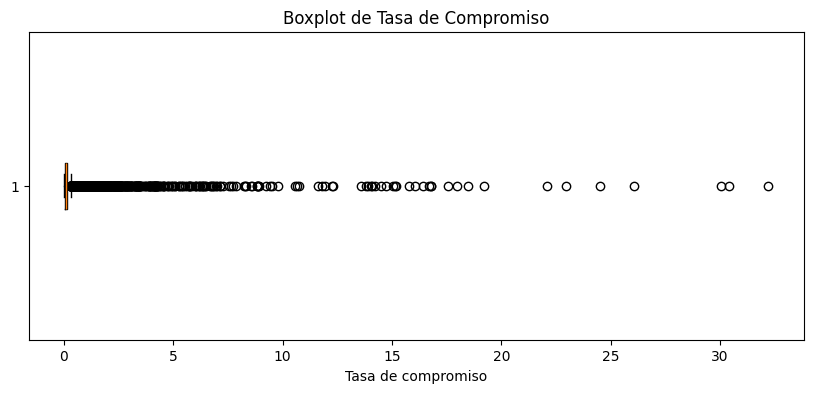

In [7875]:
# Gráfico boxplot
plt.figure(figsize=(10, 4))
plt.boxplot(redSocial["tasa_compromiso"], vert=False)  # horizontal para que se lea mejor
plt.xlabel("Tasa de compromiso")
plt.title("Boxplot de Tasa de Compromiso")
plt.show()

Antes de crear los gráficos, detectamos que algunos datos podían ser valores extremos (outliers), es decir, publicaciones con tasas de compromiso muy altas en comparación con la mayoría. Para analizarlos, planeamos mirar tanto la media como la mediana de las tasas de compromiso:

- La media nos dará una visión general de todos los datos.

- La mediana nos permitirá ver la tendencia central sin que los valores extremos la afecten demasiado.

De esta forma, podremos decidir después si preferimos la media de todos los datos, teniendo en cuenta que unos pocos puedan aumentarla demasiado, o si tener en cuenta valores céntricos.

# 5. Explicaciones y detalles antes de comenzar

Antes de comenzar con el análisis, vamos a explicar la información que hemos recogido hasta ahora:

- El dataset cuenta con 12.000 registros (publicaciones) que van desde mayo de 2024 hasta abril de 2025.

- Las **interacciones totales**, como explicamos anteriormente, son la suma de las columnas de likes, compartidos y comentarios, que nos serán muy útiles para analizar la actividad de los usuarios.

- Diferencia entre **Visualizaciones** e **Impresiones**: las visualizaciones son el número de veces únicas que se ve una publicación, mientras que las impresiones son la cantidad total. Esto quiere decir que si un usuario ha visto la misma publicación 20 veces, solamente contará como 1 visualización pero contarán las 20 impresiones. A lo largo del análisis vamos a estar refiriéndonos a las impresiones como visualizaciones para mejor comprensión, aunque técnicamente hablando son impresiones.

- La **tasa de compromiso** (engagement rate en inglés), es la relación entre las visualizaciones y las interacciones totales de una publicación. Se calcula dividiendo las interacciones totales entre las visualizaciones y multiplicándolo por 100 para sacar su porcentaje.  

# 6. Análisis

A continuación, comenzaremos con el análisis y las comparativas de los datos utilizando matplotlib, que es una biblioteca de Python de código abierto para crear visualizaciones de datos. En nuestro caso emplearemos gráficos de líneas, barras y diagramas de sectores (los que tienen forma de queso).

### 6.1 Publicaciones / Visualizaciones / Interacciones

En esta sección analizaremos las publicaciones, visualizaciones e interacciones por horas, plataformas, países… con el objetivo de comprender qué es lo que más mueve en cada ámbito.

#### 6.1.1 Evolución por mes

Con los siguientes 3 gráficos pretendemos descubrir los periodos de mayor actividad de los usuarios a lo largo de los meses

##### Evolución de publicaciones por mes

In [7876]:
# Agrupar por año y mes 
publicaciones_por_mes = redSocial.groupby(["anio", "mes"]).size()

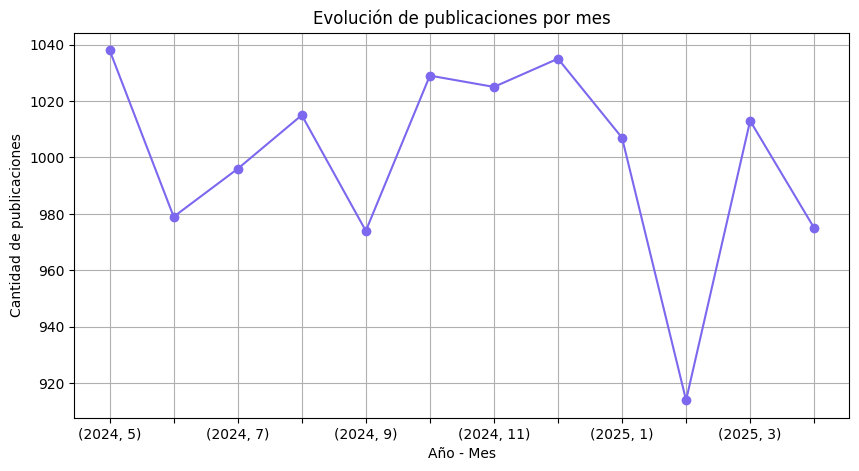

In [7877]:
# Gráfico de lineas
plt.figure(figsize=(10, 5))

publicaciones_por_mes.plot(kind="line", marker="o", color="mediumslateblue")

plt.xticks(
    ticks=range(len(publicaciones_por_mes)), # Una marca por cada mes
)

plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de publicaciones")
plt.title("Evolución de publicaciones por mes")
plt.grid(True) # Cuadrícula para ayudar a leer
plt.show()

##### Evolución de visualizaciones por mes

In [7878]:
# Agrupar por año y mes sumando las visualizaciones
visualizaciones_por_mes = (
    redSocial.groupby(["anio", "mes"])["visualizaciones"]
    .sum()
)

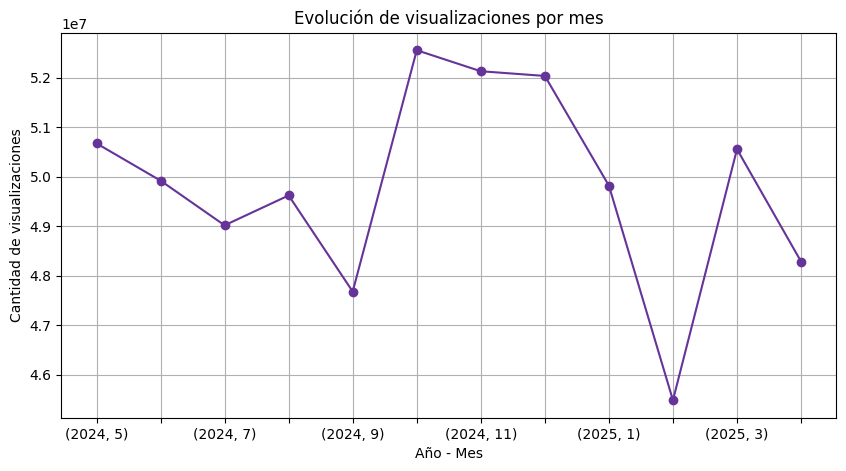

In [7879]:
# Gráfico de lineas
plt.figure(figsize=(10, 5))

visualizaciones_por_mes.plot(kind="line", marker="o", color="rebeccapurple")

plt.xticks(
    ticks=range(len(visualizaciones_por_mes)), # Una marca por cada mes
)

plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de visualizaciones")
plt.title("Evolución de visualizaciones por mes")
plt.grid(True)  # Cuadrícula para ayudar a leer
plt.show()


##### Evolución de interacciones totales por mes

In [7880]:
# Agrupar por año y mes sumando las interacciones
interacciones_por_mes = (
    redSocial.groupby(["anio", "mes"])["interacciones_totales"]
    .sum()
)

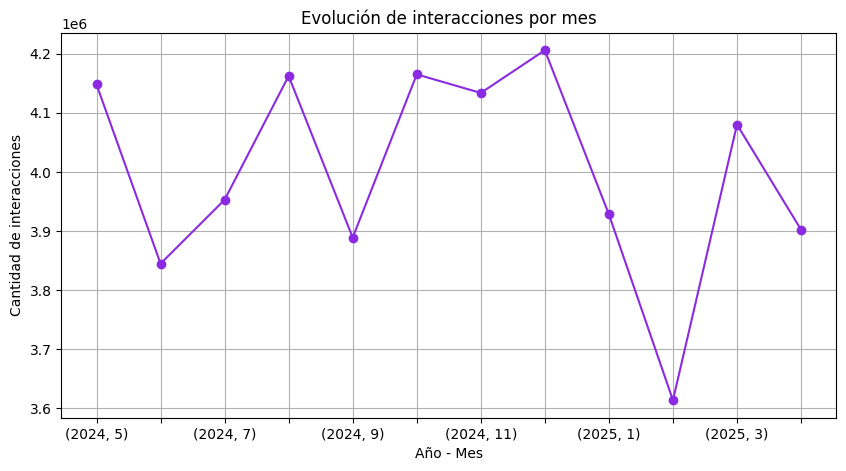

In [7881]:
# Gráfico de líneas
plt.figure(figsize=(10, 5))

interacciones_por_mes.plot(kind="line", marker="o", color="blueviolet")

plt.xticks(
    ticks=range(len(interacciones_por_mes)), # Una marca por cada mes
)

plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de interacciones")
plt.title("Evolución de interacciones por mes")
plt.grid(True)  # Cuadrícula para ayudar a leer
plt.show()


Como podemos observar, el periodo de mayor uso consta de octubre a diciembre, siendo febrero el menos utilizado. Esto es importante para saber cuándo lanzar nuestra red, lo lógico sería en octubre para 



#### 6.1.2 Evolución de publicaciones por día de la semana

En este caso, queremos comprobar el número de publicaciones a lo largo de la semana, para descubrir en qué días hay mayor uso.

In [7882]:
# Agrupar por día de la semana
publicaciones_dia_semana = (
    redSocial
    .groupby("dia_semana")
    .size()
    .reindex(dias_ordenados)  # Reordena según el orden que establecimos en la variable dias_ordenados
)

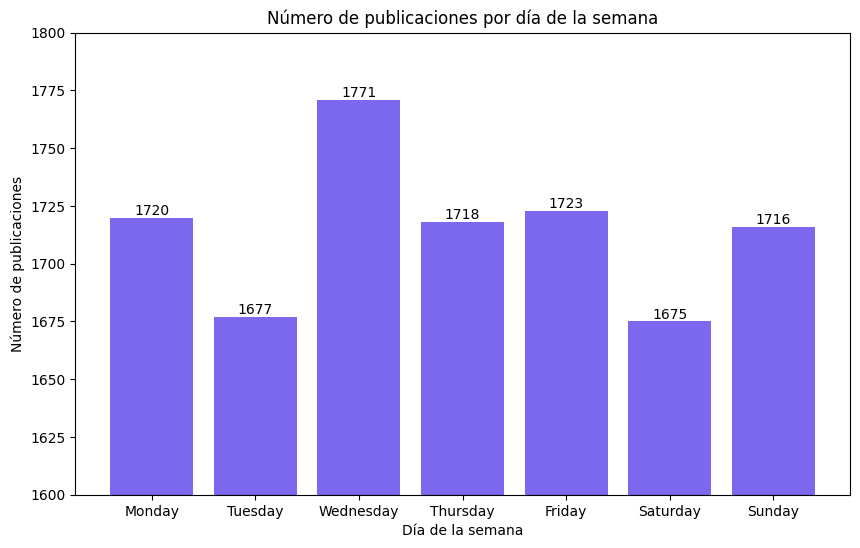

In [7883]:
# Gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(publicaciones_dia_semana.index, publicaciones_dia_semana.values, color="mediumslateblue")

plt.title("Número de publicaciones por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de publicaciones")

# Valores encima de las barras
plt.bar_label(bars)
plt.ylim(1600,1800) # Establecemos los límites del eje "y" para poder comparar mejor las cifras

plt.show()

Pese a ser entre semana, los miércoles son los días con más publicaciones.

#### 6.1.3 Distribución por plataforma

Mediante los próximos 3 gráficos deseamos averiguar qué plataformas tienen mayor uso a nivel mundial.

##### Distribución de publicaciones por plataforma

In [7884]:
# Contar publicaciones por plataforma
publicaciones_plataforma = (
    redSocial
    .groupby("plataforma")
    .size()
    .sort_values(ascending=False)
)

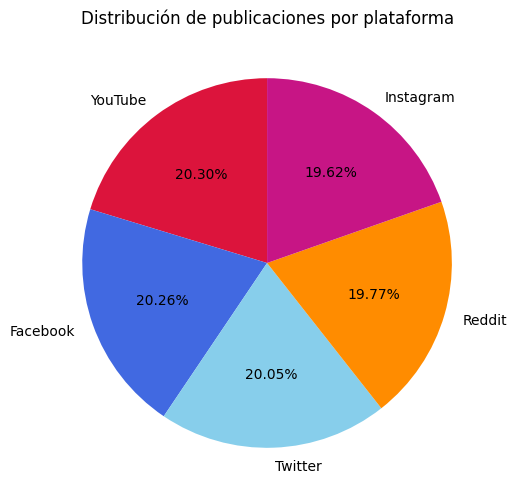

In [7885]:
# Diagrama de sectores
plt.figure(figsize=(6, 6))
plt.pie(
    publicaciones_plataforma.values,
    labels=publicaciones_plataforma.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=["crimson","royalblue","skyblue","darkorange","mediumvioletred"]
)

plt.title("Distribución de publicaciones por plataforma")
plt.show()

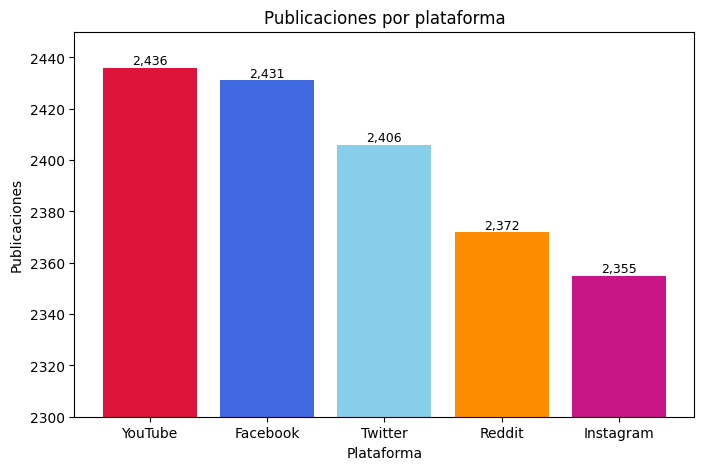

In [7886]:
# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(
    publicaciones_plataforma.index,
    publicaciones_plataforma.values,
    color=["crimson", "royalblue", "skyblue", "darkorange", "mediumvioletred"]
)

# Cantidad encima de cada barra y formato
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Publicaciones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Publicaciones")
plt.ylim(2300,2450) # Establecemos los límites del eje "y" para poder comparar mejor las cifras

plt.show()

##### Distribución de visualizaciones por plataforma

In [7887]:
# Agrupamos por plataforma y visualizaciones
visualizaciones_plataforma = (
    redSocial.groupby("plataforma")["visualizaciones"]
    .sum()
    .sort_values(ascending=False)
)

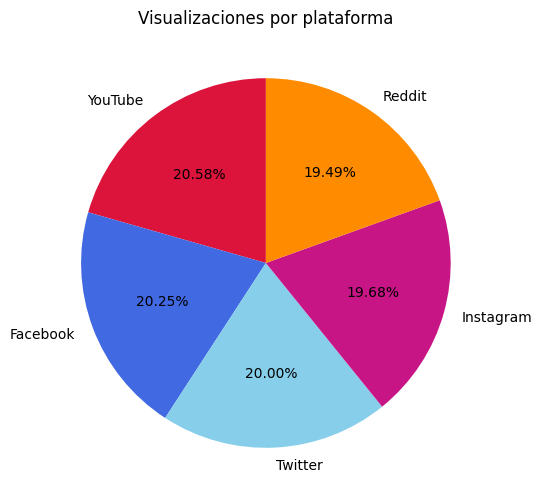

In [7888]:
# Diagrama de sectores
plt.figure(figsize=(6,6))
plt.pie(
    visualizaciones_plataforma.values,
    labels=visualizaciones_plataforma.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=["crimson", "royalblue", "skyblue", "mediumvioletred", "darkorange"]
)
plt.title("Visualizaciones por plataforma")
plt.show()

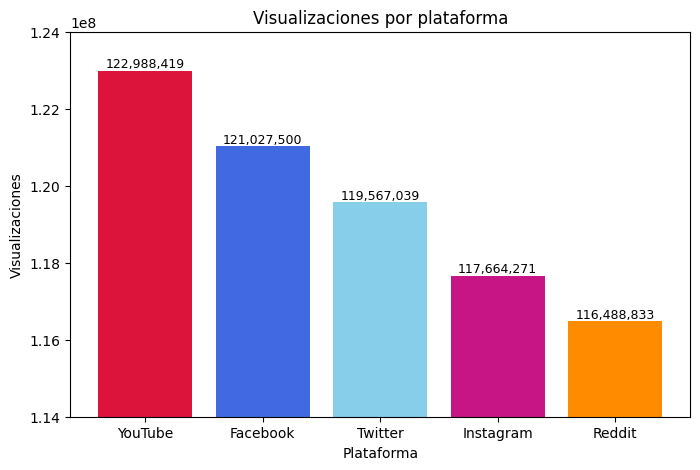

In [7889]:
# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(
    visualizaciones_plataforma.index,
    visualizaciones_plataforma.values,
    color=["crimson", "royalblue", "skyblue", "mediumvioletred", "darkorange"]
)

# Cantidad encima de cada barra
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Visualizaciones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Visualizaciones")
plt.ylim(114000000,124000000) # Establecemos los límites del eje "y" para poder comparar mejor las cifras

plt.show()

##### Distribución de interacciones totales por plataforma

In [7890]:
# Agrupamos por plataforma e interacciones
interacciones_plataforma = (
    redSocial.groupby("plataforma")["interacciones_totales"]
    .sum()
    .sort_values(ascending=False)
)

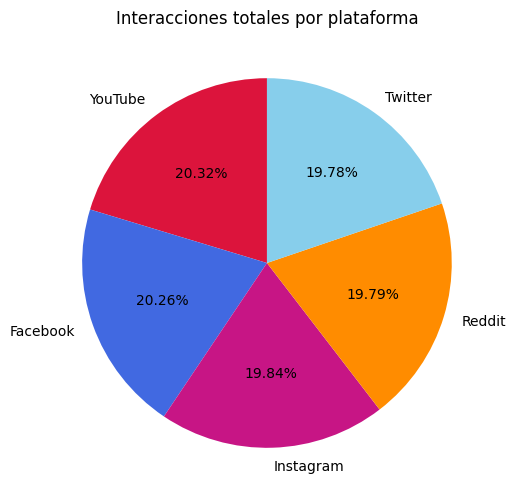

In [7891]:
# Diagrama de sectores
plt.figure(figsize=(6,6))
plt.pie(
    interacciones_plataforma.values,
    labels=interacciones_plataforma.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=["crimson", "royalblue", "mediumvioletred", "darkorange", "skyblue"]
)
plt.title("Interacciones totales por plataforma")
plt.show()

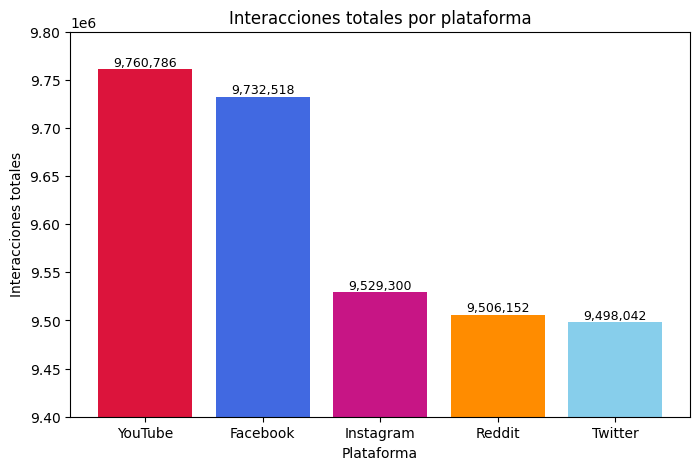

In [7892]:
# Gráfico de barras
plt.figure(figsize=(8,5))

bars = plt.bar(
    interacciones_plataforma.index,
    interacciones_plataforma.values,
    color=["crimson", "royalblue", "mediumvioletred", "darkorange", "skyblue"]
)

# Cantidad encima de cada barra
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)  # fmt sirve para darle formato a los números 

plt.title("Interacciones totales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Interacciones totales")
plt.ylim(9400000,9800000) # Establecemos los límites del eje "y" para poder comparar mejor las cifras

plt.show()

Como podemos observar en los porcentajes, son diferencias mínimas. Las cinco plataformas son prácticamente igual de utilizadas a nivel mundial.
Lo único que podríamos resaltar es que Twitter a pesar de ser la tercera con más visualizaciones, sus usuarios no tienden a interactuar tanto con las publicaciones

#### 6.1.4 Publicaciones ordenados por idioma

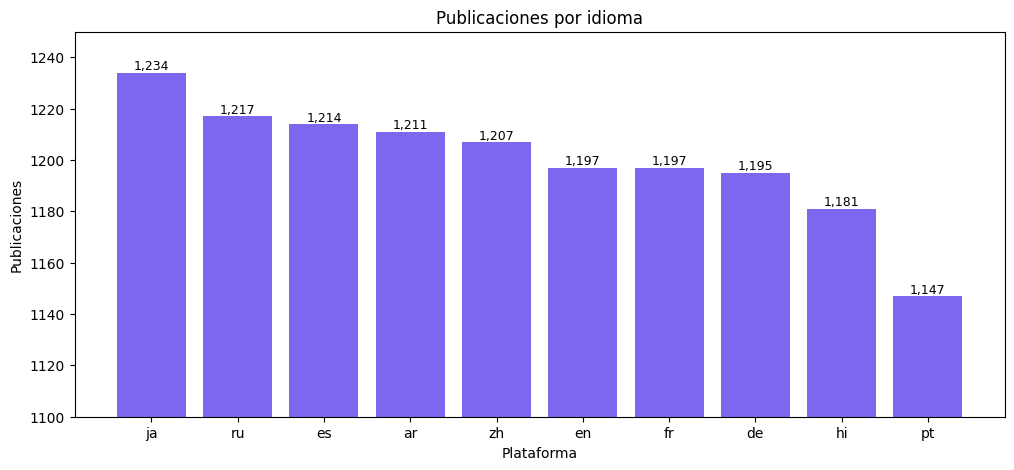

In [7893]:
# Contar publicaciones por idioma
publicaciones_idioma = (
    redSocial
    .groupby("idioma")
    .size()
    .sort_values(ascending=False)
)

# Gráfico de barras
plt.figure(figsize=(12,5))
bars = plt.bar(
    publicaciones_idioma.index,
    publicaciones_idioma.values,
    color="mediumslateblue"
)

# Valores encima de las barras y formato
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Publicaciones por idioma")
plt.xlabel("Plataforma")
plt.ylabel("Publicaciones")
plt.ylim(1100,1250)

plt.show()

#### 6.1.5 Países y continentes ordenados por visualizaciones e interacciones totales

##### Países ordenados por visualizaciones

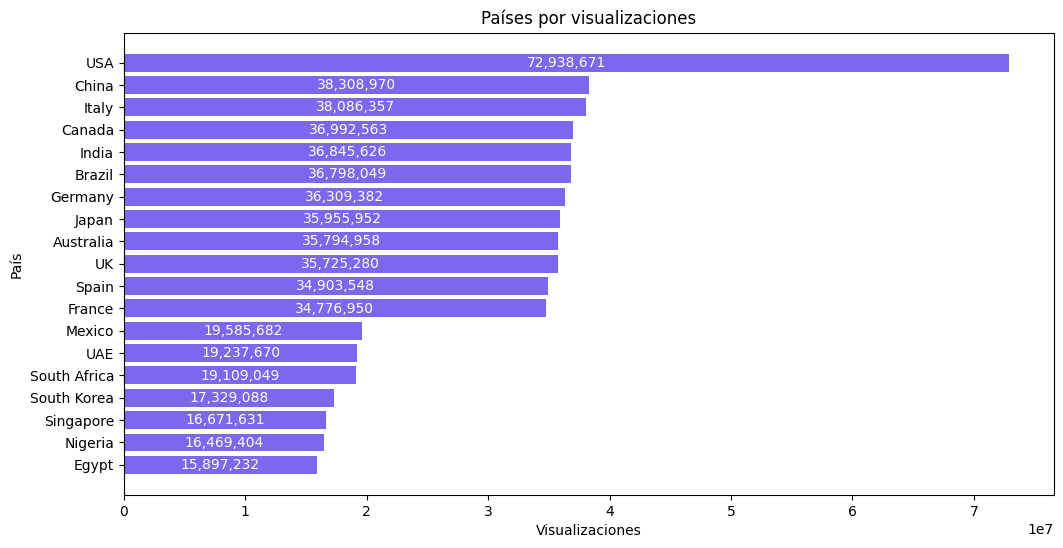

In [7894]:
visualizaciones_pais = (
    redSocial.groupby("pais")["visualizaciones"]
    .sum()
    .sort_values(ascending=True)
)

plt.figure(figsize=(12,6))

bars = plt.barh(visualizaciones_pais.index, visualizaciones_pais.values, color="mediumslateblue")

# Ponemos las etiquetas dentro y de color blanco, para que se vean mejor
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.0f}') 

plt.title("Países por visualizaciones")
plt.xlabel("Visualizaciones")
plt.ylabel("País")
plt.show()

##### Países ordenados por interacciones totales

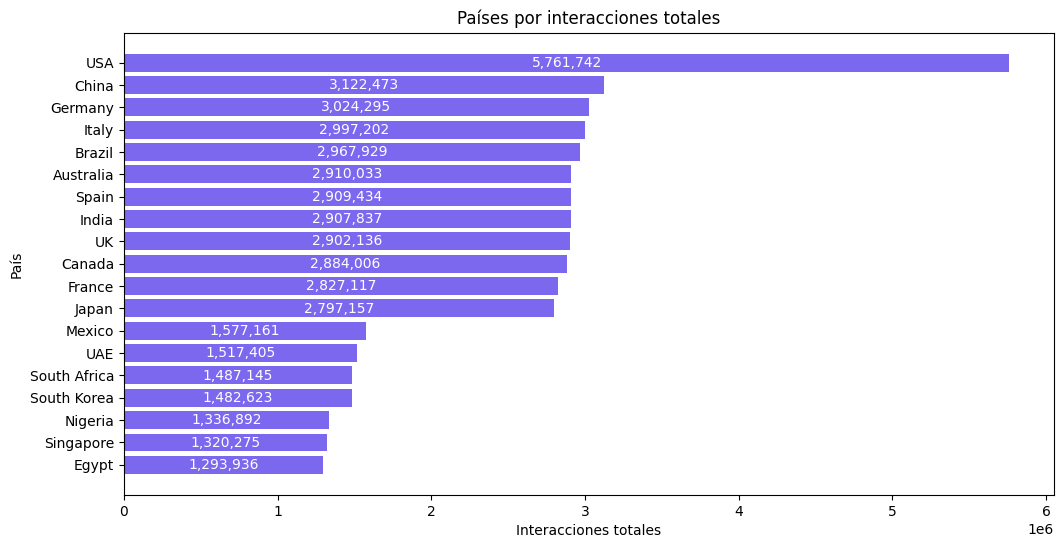

In [7895]:
interacciones_pais = (
    redSocial.groupby("pais")["interacciones_totales"]
    .sum()
    .sort_values(ascending=True)
)

plt.figure(figsize=(12,6))

bars = plt.barh(interacciones_pais.index, interacciones_pais.values, color="mediumslateblue")

# Ponemos las etiquetas dentro y de color blanco, para que se vean mejor
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.0f}') 

plt.title("Países por interacciones totales")
plt.xlabel("Interacciones totales")
plt.ylabel("País")
plt.show()

La diferencia entre Estados Unidos y China es prácticamente el doble.
Esta diferencia nos deja claro que un gran paso para que nuestra red social triunfase sería tratar de popularizarla en Estados Unidos.


##### Continentes ordenados por visualizaciones

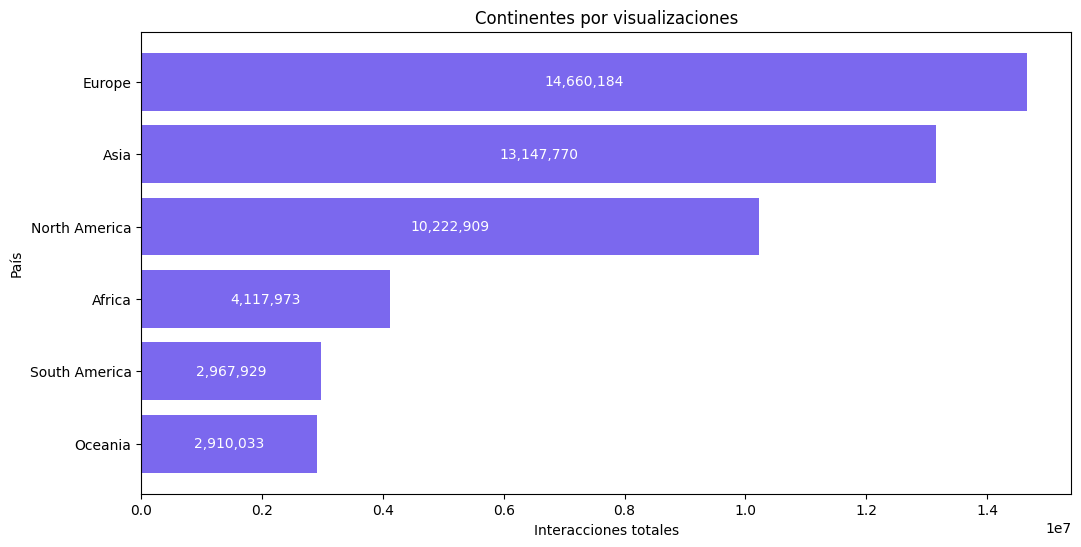

In [7896]:
visualizaciones_continente = (
    redSocial.groupby("continente")["interacciones_totales"]
    .sum()
    .sort_values(ascending=True)
)

plt.figure(figsize=(12,6))

bars = plt.barh(visualizaciones_continente.index, visualizaciones_continente.values, color="mediumslateblue")

# Ponemos las etiquetas dentro y de color blanco, para que se vean mejor
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.0f}') 

plt.title("Continentes por visualizaciones")
plt.xlabel("Interacciones totales")
plt.ylabel("País")
plt.show()

##### Continentes ordenados por interacciones totales

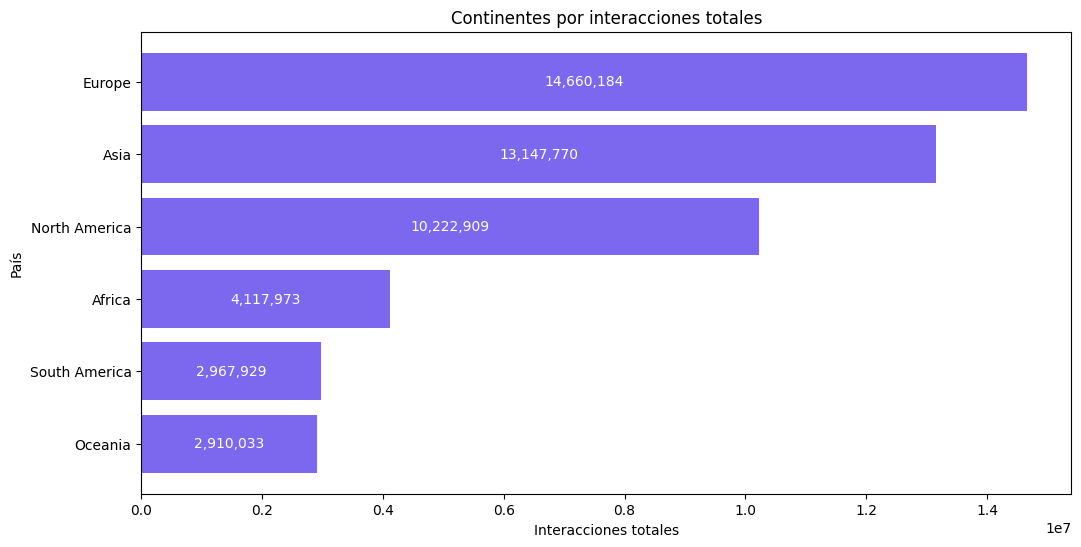

In [7897]:
interacciones_continente = (
    redSocial.groupby("continente")["interacciones_totales"]
    .sum()
    .sort_values(ascending=True)
)

plt.figure(figsize=(12,6))

bars = plt.barh(interacciones_continente.index, interacciones_continente.values, color="mediumslateblue")

# Ponemos las etiquetas dentro y de color blanco, para que se vean mejor
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.0f}') 

plt.title("Continentes por interacciones totales")
plt.xlabel("Interacciones totales")
plt.ylabel("País")
plt.show()

Aunque Estados Unidos sea claramente el país con más interacciones y visualizaciones, agrupados por continentes la cosa cambia. Solamente Estados Unidos hace más de la mitad de interacciones de Norte América, pero no le alcanza ni a llegar al segundo continente con más visualizaciones/interacciones.

#### Interacciones totales vs visualizaciones por hora del día

In [7898]:
# Agrupamos por hora y calculamos la media de interacciones y visualizaciones
metricas_hora = (
    redSocial
    .groupby("hora")[["interacciones_totales", "visualizaciones"]]
    .mean()
)

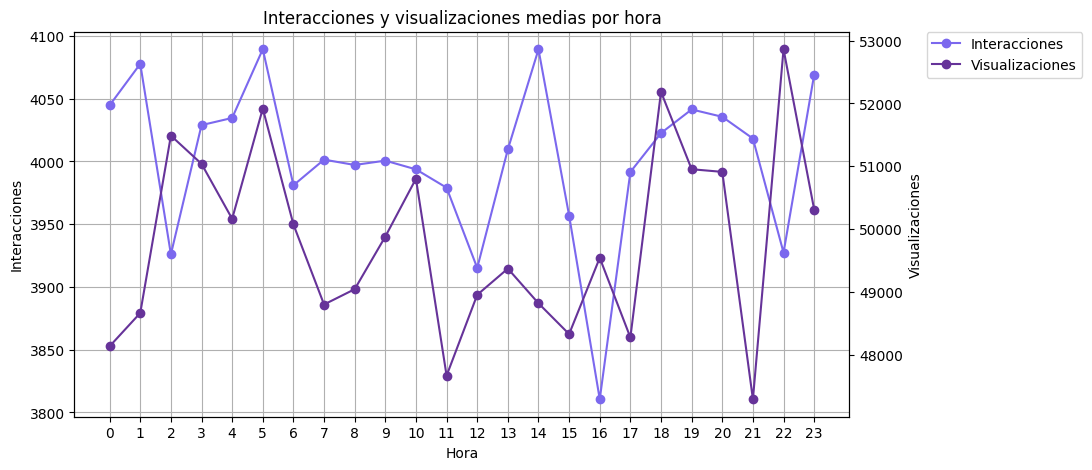

In [7899]:
# Gráficos de líneas
fig, ax1 = plt.subplots(figsize=(10, 5))

# Interacciones (eje izquierdo)
linea1 = ax1.plot(
    metricas_hora.index,
    metricas_hora["interacciones_totales"],
    marker='o',
    color="mediumslateblue",
    label="Interacciones"
)
ax1.set_xlabel("Hora")
ax1.set_ylabel("Interacciones")
ax1.set_xticks(range(24))
ax1.grid(True)

# Visualizaciones (eje derecho)
ax2 = ax1.twinx() # Usamos twinx para mostrar dos gráficos de líneas de diferentes escalas juntos
linea2 = ax2.plot(
    metricas_hora.index,
    metricas_hora["visualizaciones"],
    marker='o',
    color="rebeccapurple",
    label="Visualizaciones"
)
ax2.set_ylabel("Visualizaciones")

# Leyenda conjunta
lineas = linea1 + linea2
labels = [l.get_label() for l in lineas] # Tomamos las etiquetas de las lineas
ax1.legend(lineas, labels, loc="center", bbox_to_anchor=(1.2, 0.94)) # Añadimos las lineas y etiquetas, y colocamos la leyenda en una buena zona

plt.title("Interacciones y visualizaciones medias por hora")
plt.show()

En este gráfico podemos observar las horas en las que hay más actividad con los posts.
Las 05:00 y las 18:00 serían las horas con mejor relación entre interacciones y visualizaciones.

#### Interacciones totales vs visualizaciones por franja horaria

In [7900]:
# Agrupamos por franja y sumamos interacciones y visualizaciones
metricas_franja = redSocial.groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]].sum()

C:\Users\Asier\AppData\Local\Temp\ipykernel_15016\711017069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metricas_franja = redSocial.groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]].sum()


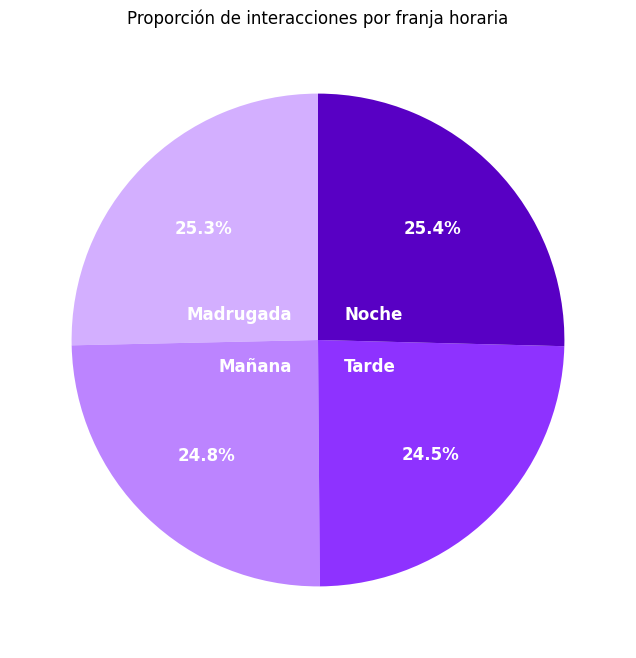

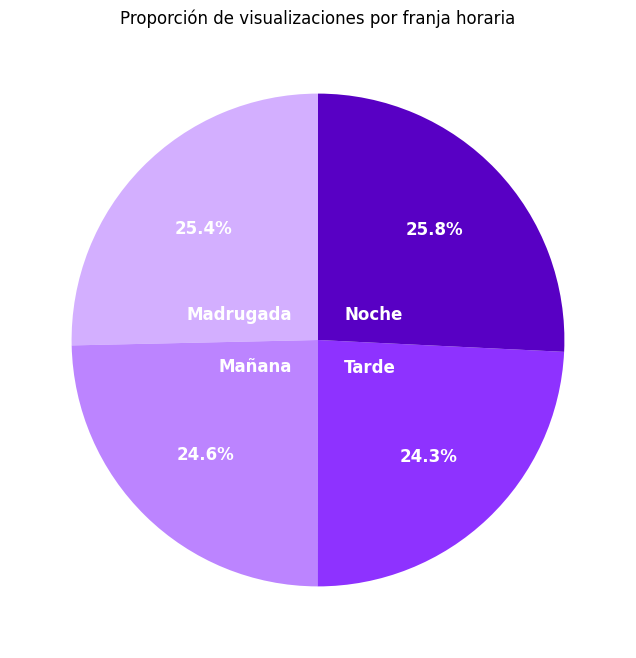

In [7901]:
# Diagrama de sectores para interacciones
plt.figure(figsize=(8,8))
plt.pie(
    metricas_franja["interacciones_totales"],
    labels=metricas_franja.index,
    autopct='%1.1f%%', # Para que aparezca el porcentaje
    pctdistance=0.65,   # Porcentajes fuera del pastel
    labeldistance=0.15,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90, # Para que esté centrado
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)
plt.title("Proporción de interacciones por franja horaria")
plt.show()

#  Diagrama de sectores para visualizaciones
plt.figure(figsize=(8,8))
plt.pie(
    metricas_franja["visualizaciones"],
    labels=metricas_franja.index,
    autopct='%1.1f%%',
    pctdistance=0.65,   # Porcentajes fuera del pastel
    labeldistance=0.15,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90,
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)
plt.title("Proporción de visualizaciones por franja horaria")
plt.show()

A nivel global, el índice de interacción y visualización es prácticamente el mismo en cada etapa del día. Depende de en qué zona del mundo estemos tendremos una hora u otra, por lo que es muy díficil que todos los usuarios coincidan en la misma franja.


#### Top 10 campañas con más interacciones

In [7902]:
# Interacciones totales por campaña
interacciones_campania = (
    redSocial
    .groupby("nombre_campania")["interacciones_totales"]
    .sum()
    .head(10)
    .sort_values(ascending=False)
)

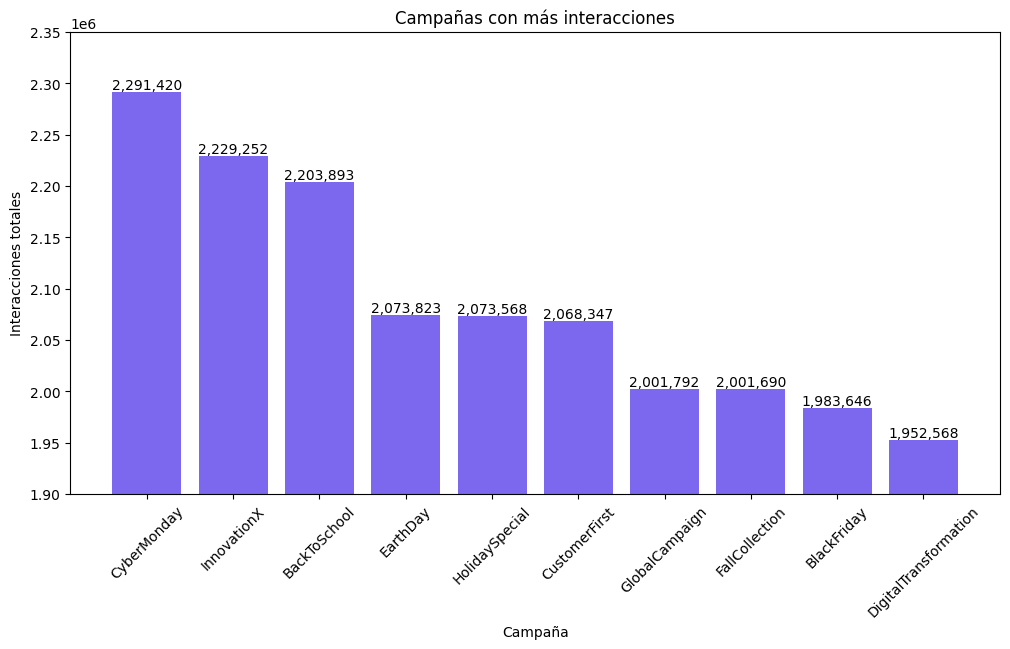

In [7903]:
# Gráfico de barras
plt.figure(figsize=(12, 6))

bars = plt.bar(
    interacciones_campania.index,
    interacciones_campania.values,
    color="mediumslateblue"
)

plt.xlabel("Campaña")
plt.ylabel("Interacciones totales")
plt.title("Campañas con más interacciones")

# Rotar nombres para que se lean bien
plt.xticks(rotation=45)

# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.0f}')
plt.ylim(1900000,2350000)

plt.show()


Promocionar esas campañas en nuestra red será útil para llegar a más personas.

### 6.2 Conclusiones: Publicaciones / Visualizaciones / Interacciones 

Como la diferencia de uso a nivel global no es muy notoria, priorizaremos el nivel de uso en España, que es el país donde planeamos el lanzamiento de la red.

Si conseguimos que triunfe en nuestro país, el siguiente paso será expandirse al extranjero, como por ejemplo Estados Unidos o Europa, ya que son el país y continente con mayor interacción respectivamente.

### 6.3 Marcas / Productos / Categorías

A continuación, analizaremos la tasa de compromiso de las diferentes marcas, productos y categorías, para saber a qué le prestan más atención los usuarios.

#### 6.3.1 Marcas

##### Marcas con mayor tasa de compromiso

In [7904]:
# Agrupamos marcas por tasa de compromiso
media_marcas_tasa_compromiso = (
    redSocial
    .groupby("nombre_marca")["tasa_compromiso"]
    .mean() # Calculamos la media
    .sort_values(ascending=True) # Ordenamos de mayor a menor
)

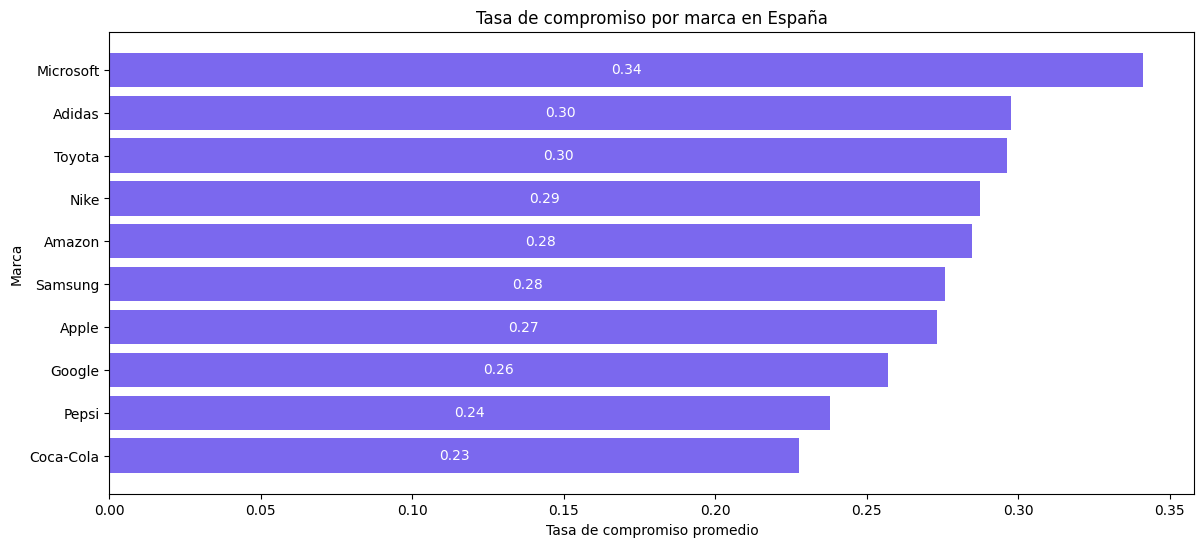

In [7905]:
# Gráfico de barras
plt.figure(figsize=(14,6))

bars = plt.barh(
    media_marcas_tasa_compromiso.index,
    media_marcas_tasa_compromiso.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por marca en España")
plt.xlabel("Tasa de compromiso promedio")
plt.ylabel("Marca")

# Valores encima de las barras y formato decimal
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.2f}') 

plt.show()

En cuanto a marcas, Microsoft predomina sobre el resto, aunque están a un nivel muy parecido.

##### Mediana de marcas por tasa de compromiso

Con el siguiente gráfico pretendemos ver cual de las anteriores marcas quedan evitando outliers.

In [7906]:
# Agrupamos marcas por tasa de compromiso
mediana_marcas_tasa_compromiso = (
    redSocial
    .groupby("nombre_marca")["tasa_compromiso"]
    .median() # Calculamos la mediana
    .sort_values(ascending=True) # Ordenamos de mayor a menor
)

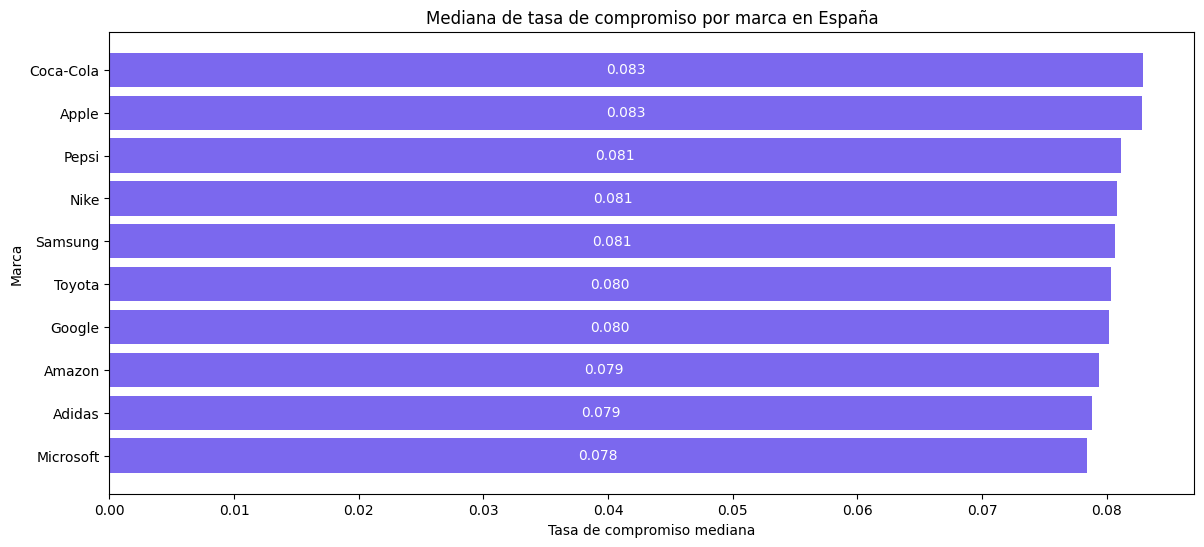

In [7907]:
# Gráfico de barras
plt.figure(figsize=(14,6))

bars = plt.barh(
    mediana_marcas_tasa_compromiso.index,
    mediana_marcas_tasa_compromiso.values,
    color="mediumslateblue"
)

plt.title("Mediana de tasa de compromiso por marca en España")
plt.xlabel("Tasa de compromiso mediana")
plt.ylabel("Marca")

# Valores encima de las barras y formato decimal
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.3f}') 

plt.show()

En este caso, podemos concluir que los datos son muy parejos y no dependen tanto de outliers. Nike se mantiene en una posición elevada.

#### 6.3.2 Productos

##### Productos con mayor tasa de compromiso

In [7908]:
# Agrupamos productos por tasa de compromiso
media_productos_tasa_compromiso = (
    redSocial
    .groupby("nombre_producto")["tasa_compromiso"]
    .mean() # Calculamos la media
    .sort_values(ascending=False) # Ordenamos de mayor a menor
    .head(10) # Seleccionamos los primeros 10
)

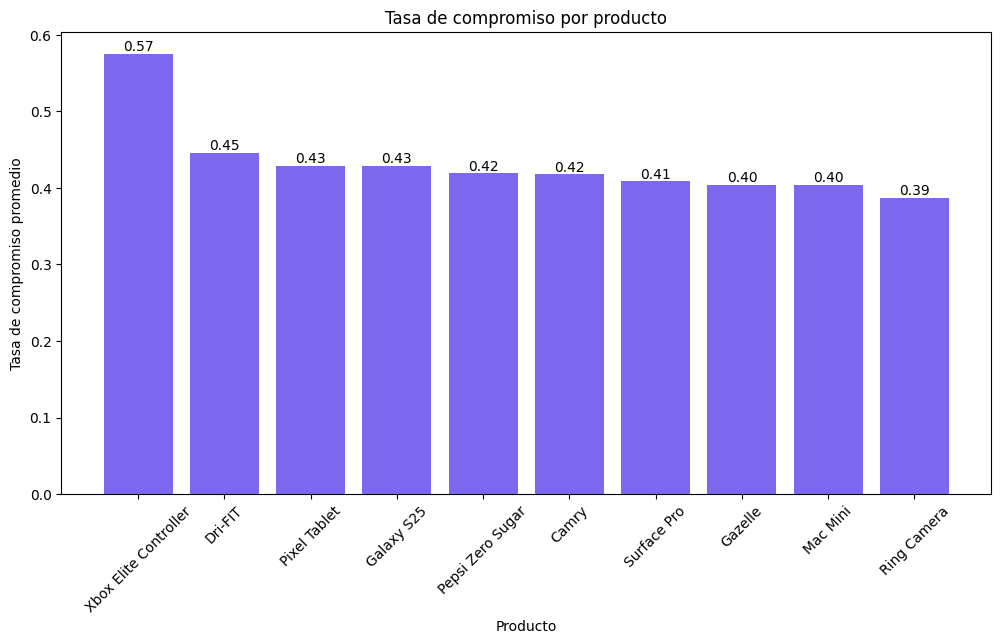

In [7909]:
# Gráfico de barras
plt.figure(figsize=(12,6))

bars = plt.bar(
    media_productos_tasa_compromiso.index,
    media_productos_tasa_compromiso.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por producto")
plt.xlabel("Producto")
plt.ylabel("Tasa de compromiso promedio")


# Valores encima de las barras y formato decimal
plt.bar_label(bars, fmt='{:,.2f}')

# Rotar nombres para que se lean bien
plt.xticks(rotation=45)

plt.show()

Como podemos observar en este gráfico, el mando de Xbox es el producto con mayor tasa de compromiso, aunque al ser tan elevado nos deja claro que depende mucho de outliers.

##### Mediana de productos por tasa de compromiso

Con el siguiente gráfico pretendemos ver cual de los anteriores productos quedan evitando outliers

In [7910]:
# Agrupamos productos por tasa de compromiso
mediana_productos_tasa_compromiso = (
    redSocial
    .groupby("nombre_producto")["tasa_compromiso"]
    .median() # Calculamos la mediana
    .sort_values(ascending=False) # Ordenamos de mayor a menor
    .head(10) # Seleccionamos los primeros 10
)

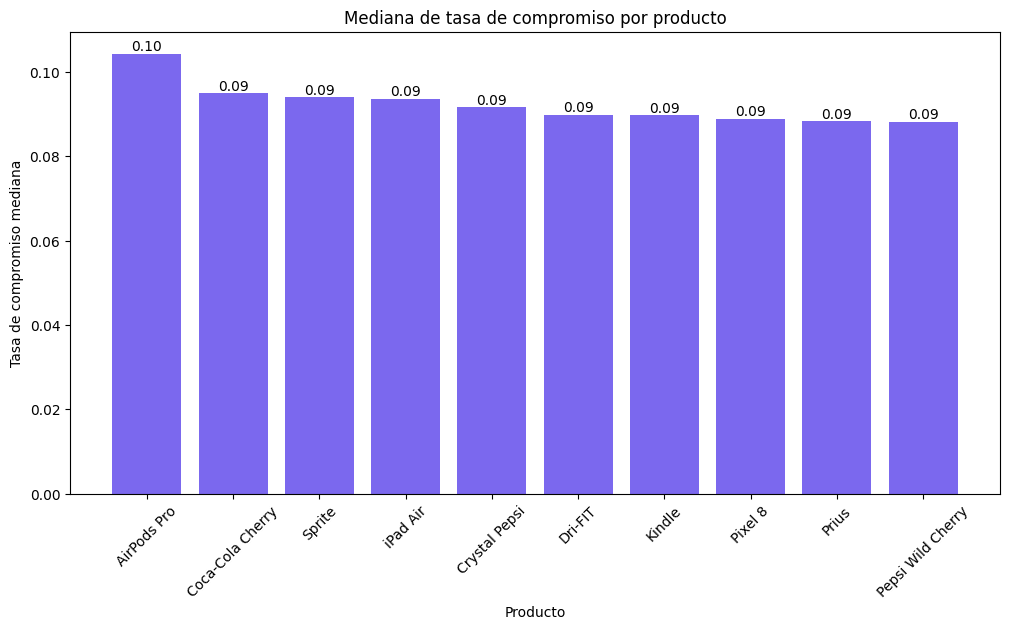

In [7911]:
# Gráfico de barras
plt.figure(figsize=(12,6))

bars = plt.bar(
    mediana_productos_tasa_compromiso.index,
    mediana_productos_tasa_compromiso.values,
    color="mediumslateblue"
)

plt.title("Mediana de tasa de compromiso por producto")
plt.xlabel("Producto")
plt.ylabel("Tasa de compromiso mediana")


# Valores encima de las barras y formato decimal
plt.bar_label(bars, fmt='{:,.2f}')

# Rotar nombres para que se lean bien
plt.xticks(rotation=45)

plt.show()

Tras calcular la mediana, comprobamos que la media de los productos anteriores dependía mucho de outliers. El mando de Xbox ni siquiera aparece entre los 10 primeros.

#### 6.3.3 Categorías

##### Categorías con mayor tasa de compromiso

In [7912]:
# Agrupamos categorías por tasa de compromiso
media_categoria_tasa_compromiso = (
    redSocial
    .groupby("categoria_tema")["tasa_compromiso"]
    .mean() # Calculamos la media
    .sort_values(ascending=False) # Ordenamos de mayor a menor
)

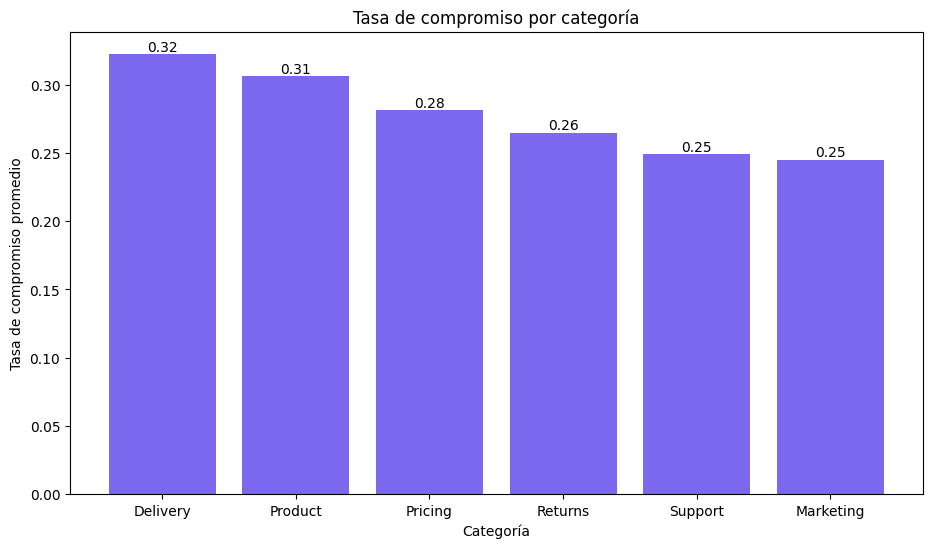

In [7913]:
# Gráfico de barras
plt.figure(figsize=(11,6))

bars = plt.bar(
    media_categoria_tasa_compromiso.index,
    media_categoria_tasa_compromiso.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por categoría")
plt.xlabel("Categoría")
plt.ylabel("Tasa de compromiso promedio")


# Valores encima de las barras y formato decimal
plt.bar_label(bars, fmt='{:,.2f}')

plt.show()

Al igual que con las marcas, las categorías también están a un nivel muy parecido.

##### Mediana de categorías con mayor tasa de compromiso

Con el siguiente gráfico pretendemos ver cual de las anteriores categorías quedan evitando outliers.

In [7914]:
# Agrupamos categorías por tasa de compromiso
mediana_categoria_tasa_compromiso = (
    redSocial
    .groupby("categoria_tema")["tasa_compromiso"]
    .median() # Calculamos la mediana
    .sort_values(ascending=False) # Ordenamos de mayor a menor
)

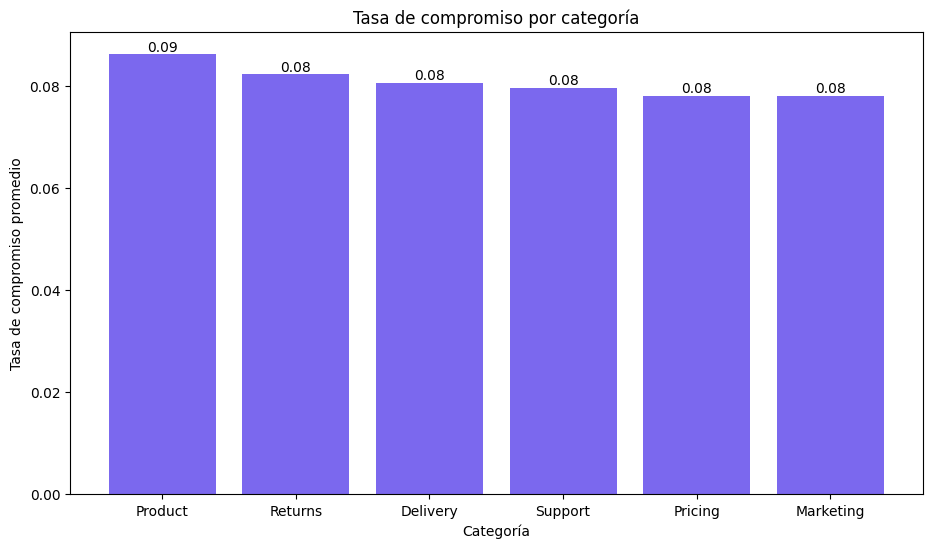

In [ ]:
# Gráfico de barras
plt.figure(figsize=(11,6))

bars = plt.bar(
    mediana_categoria_tasa_compromiso.index,
    mediana_categoria_tasa_compromiso.values,
    color="mediumslateblue"
)

plt.title("Mediana de tasa de compromiso por categoría")
plt.xlabel("Categoría")
plt.ylabel("Tasa de compromiso mediana")


# Valores encima de las barras y formato decimal
plt.bar_label(bars, fmt='{:,.2f}')

plt.show()

En el caso de las categorías, nos queda más que claro que los outliers no son un factor clave, ya que están demasiado parejos.

### 6.4 Conclusiones: Publicaciones / Visualizaciones / Interacciones 

La tasa de compromiso es subjetiva, algunas publicaciones tienen interacciones exageradas respecto a la visualizaciones (outliers), por lo cual no nos podemos fiar siempre de la media.

El apoyo de las marcas, productos y categorías nos será muy útil para llamar la atención de los usuarios.

Si logramos colaborar o promocionamos aquellas que son populares entre los usuarios de las redes, lograremos dar el paso a la popularidad más rápidamente.

### 6.5 Toxicidad / Emociones / Mensajes

Ahora vamos a comparar las publicaciones por su nivel de toxicidad, longitud de texto y las emociones que causan en los usuarios. 

Buscamos conocer cómo se expresan los usuarios para poder comprenderlos mejor.

#### 6.5.1 Toxicidad media por plataforma


In [7916]:
# Agrupamos por plataforma y toxicidad
toxicidad_plataforma = (
    redSocial.groupby("plataforma")["toxicidad"]
    .mean() # Calculamos la media
    .sort_values(ascending=False)
)

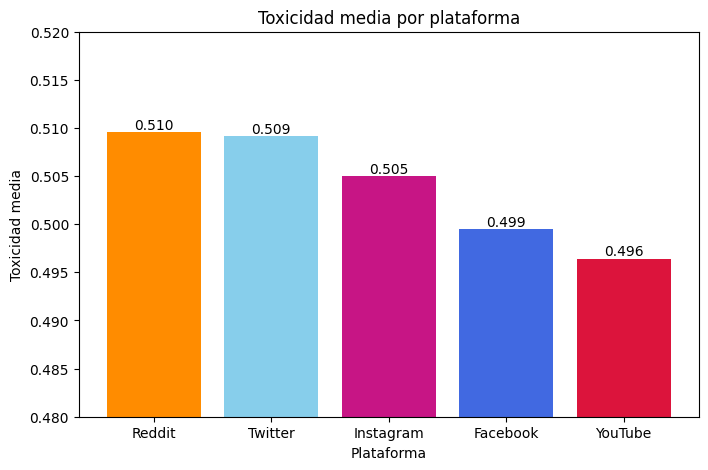

In [7917]:
# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(
    toxicidad_plataforma.index,
    toxicidad_plataforma.values,
    color=["darkorange", "skyblue", "mediumvioletred", "royalblue", "crimson"]
)

plt.title("Toxicidad media por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Toxicidad media")

# Valores encima de las barras
plt.bar_label(bars, fmt="%.3f")
plt.ylim(0.48,0.52)
plt.show()

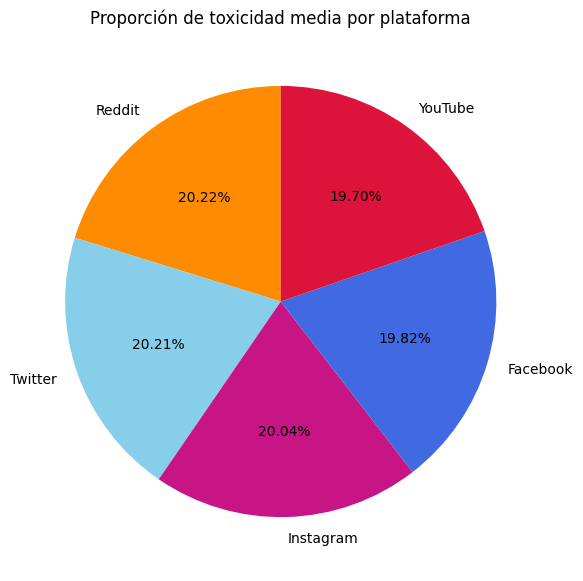

In [7918]:
# Diagrama de sectores
plt.figure(figsize=(7,7))
plt.pie(
    toxicidad_plataforma.values,
    labels=toxicidad_plataforma.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=["darkorange", "skyblue", "mediumvioletred", "royalblue", "crimson"]
)
plt.title("Proporción de toxicidad media por plataforma")
plt.show()

Las plataformas están parejas en cuanto a toxicidad. Sin embargo, como vimos en el apartado 1 (Publicaciones, interacciones, visualizaciones) Reddit no entra en el top 3 de publiaciones ni interacciones, por lo que eso habla mal de su nivel de toxicidad al estar en primer lugar (muy tóxico).

#### 6.5.2 Toxicidad media por continente


In [7919]:
# Toxicidad media por continente
toxicidad_continente = (
    redSocial
    .groupby("continente")["toxicidad"]
    .mean()
    .sort_values(ascending=False)
)

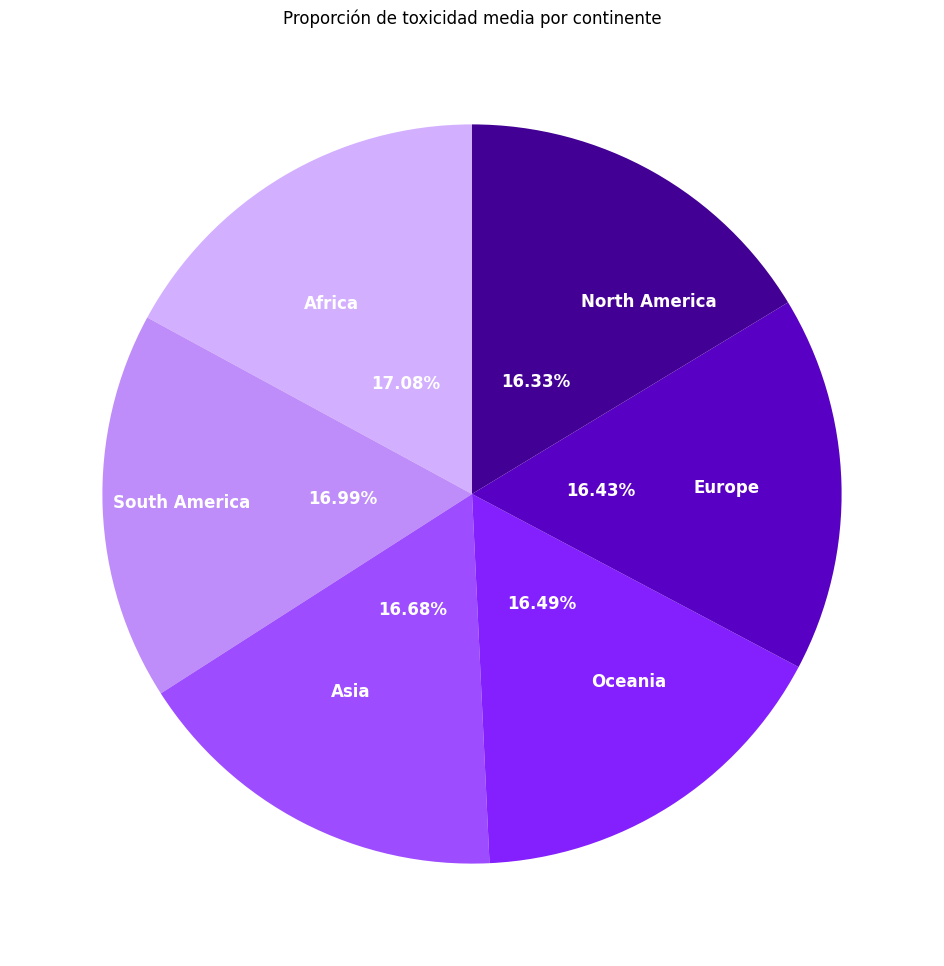

In [7920]:
plt.figure(figsize=(12,12))

plt.pie(
    toxicidad_continente.values,
    labels=toxicidad_continente.index,
    autopct='%1.2f%%',
    startangle=90,
    pctdistance=0.35,   # Porcentajes fuera del pastel
    labeldistance=0.6,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BE8DF9", "#9D4CFF", "#8320FD", "#5800C4", "#430094"],
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)

plt.title("Proporción de toxicidad media por continente")
plt.show()


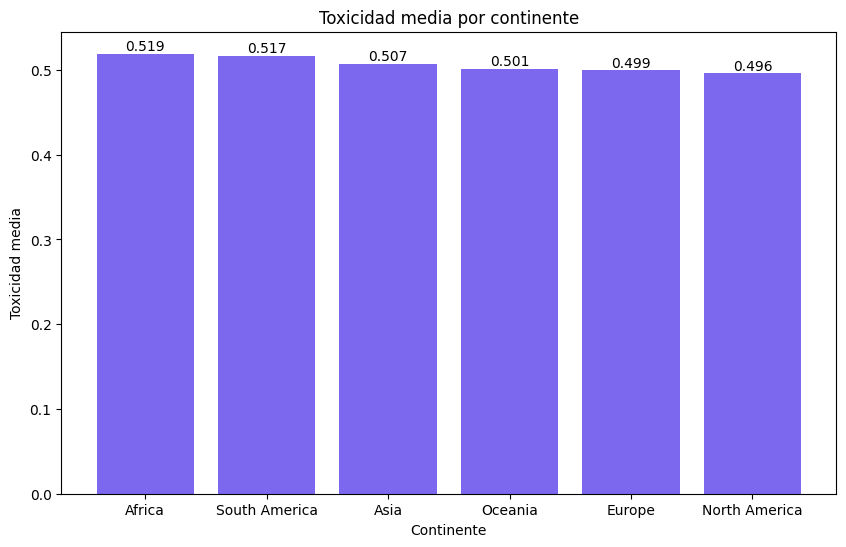

In [7921]:
plt.figure(figsize=(10, 6))

bars = plt.bar(
    toxicidad_continente.index,
    toxicidad_continente.values,
    color="mediumslateblue"
)

plt.xlabel("Continente")
plt.ylabel("Toxicidad media")
plt.title("Toxicidad media por continente")

# Valores encima de las barras
plt.bar_label(bars, fmt="%.3f")

plt.show()

Todos los continentes están a la par en cuanto a toxicidad se refiere. A pesar de que en Asia habita más de la mitad de la población mundial, no es ni el segundo continente más tóxico, lo cual habla muy bien de su nivel de toxicidad.

#### 6.5.3 Longitud media de mensajes


In [7922]:
# Agrupamos las publicaciones por la columna de longitud que creamos al inicio
publicaciones_texto = (
    redSocial
    .groupby("longitud_texto")
    .size()
    .sort_values(ascending=False)
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_15016\2434336265.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("longitud_texto")


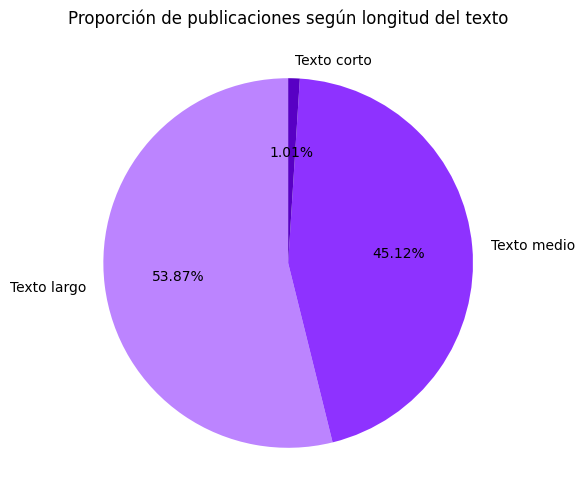

In [7923]:
plt.figure(figsize=(6,6))

plt.pie(
    publicaciones_texto.values,
    labels=publicaciones_texto.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=["#BC84FF", "#8E32FF", "#5800C4"],
)

plt.title("Proporción de publicaciones según longitud del texto")
plt.show()

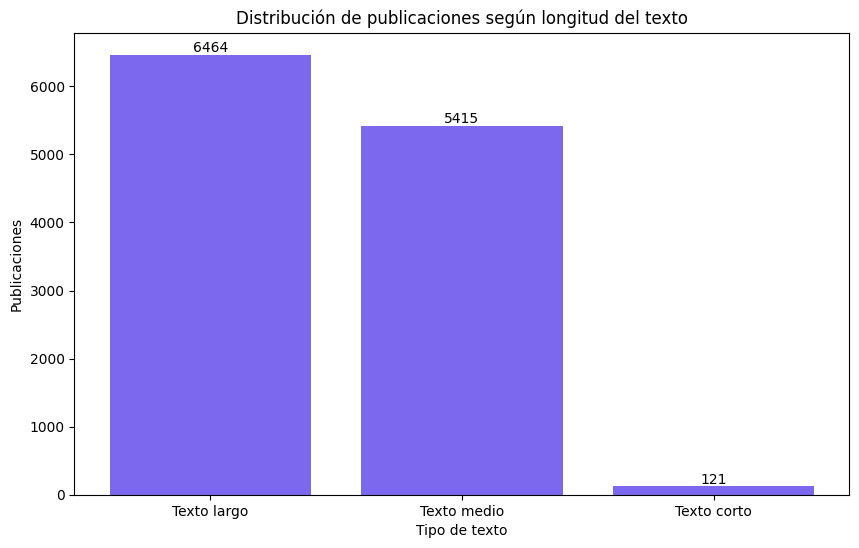

In [7924]:
plt.figure(figsize=(10, 6))

bars = plt.bar(
    publicaciones_texto.index,
    publicaciones_texto.values,
    color="mediumslateblue"
)

plt.xlabel("Tipo de texto")
plt.ylabel("Publicaciones")
plt.title("Distribución de publicaciones según longitud del texto")

# Valores encima de las barras
plt.bar_label(bars, fmt="%.0f")

plt.show()

De 12.000 publicaciones solamente 121 son de longitud inferior a 70 caracteres (texto corto). Los usuarios tienden a escribir mensajes largos.

#### 6.5.4 Toxicidad por longitud de mensaje


In [7925]:
# Agrupamos por toxicidad y longitud de texto
toxicidad_texto = (
    redSocial
    .groupby("longitud_texto")["toxicidad"]
    .mean()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_15016\2134474326.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("longitud_texto")["toxicidad"]


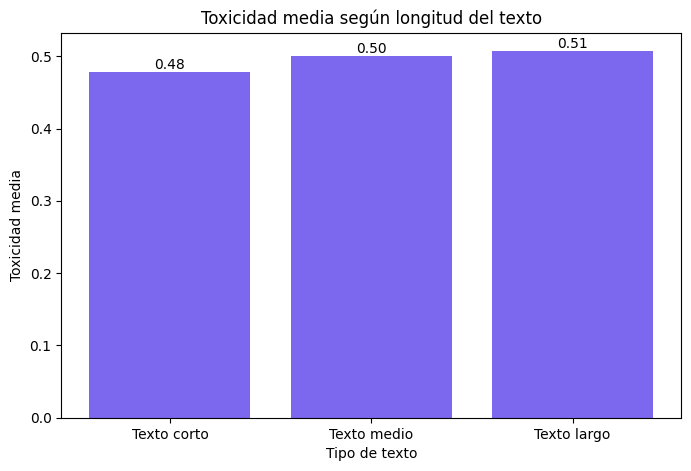

In [7926]:
plt.figure(figsize=(8,5))
bars = plt.bar(
    toxicidad_texto.index,
    toxicidad_texto.values,
    color="mediumslateblue"
)

plt.title("Toxicidad media según longitud del texto")
plt.xlabel("Tipo de texto")
plt.ylabel("Toxicidad media")

plt.bar_label(bars, fmt="%.2f")
plt.show()

A pesar de ser una diferencia mínima, podemos concluir que a mayor longitud de mensaje mayor porcentaje de toxicidad.

#### 6.5.5 Toxicidad media por tipo de emoción

In [7927]:
# Agrupamos por tipo de emoción y toxicidad media
emocion_toxicidad = (
    redSocial
    .groupby("emocion")["toxicidad"]
    .mean()
    .sort_values(ascending=False)
)

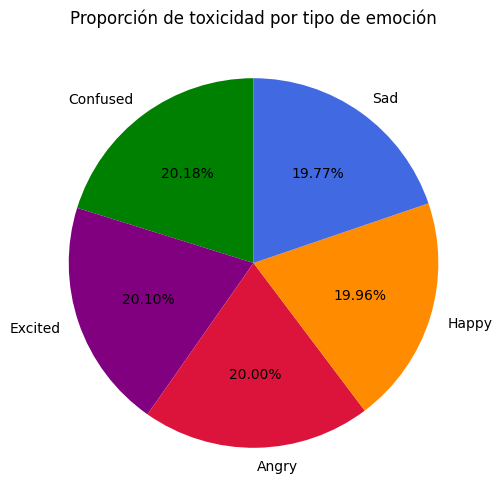

In [7928]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    emocion_toxicidad.values,
    labels=emocion_toxicidad.index,
    autopct='%1.2f%%',
    startangle=90,
    colors=["green", "purple", "crimson", "darkorange", "royalblue"]
)

plt.title("Proporción de toxicidad por tipo de emoción")
plt.show()

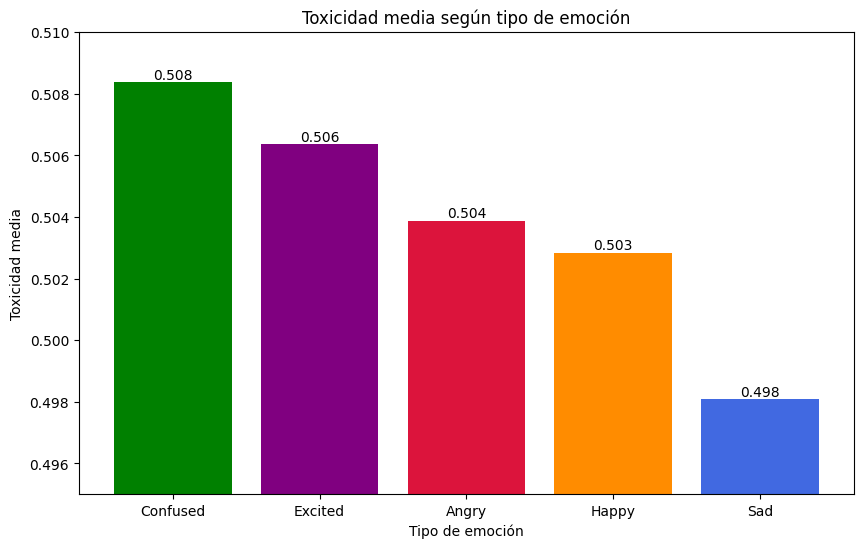

In [7929]:
plt.figure(figsize=(10,6))

bars = plt.bar(
    emocion_toxicidad.index,
    emocion_toxicidad.values,
    color=["green", "purple", "crimson", "darkorange", "royalblue"]
)

plt.xlabel("Tipo de emoción")
plt.ylabel("Toxicidad media")
plt.title("Toxicidad media según tipo de emoción")

# Valores encima de las barras
plt.bar_label(bars, fmt="%.3f")
plt.ylim(0.495,0.51)

plt.show()

Todas las emociones están muy parejas en cuanto a toxicidad, pero las publicaciones tristes no tienden a ser tan tóxicas como el resto.
Podemos interpretar que la gente suele ser más correcta y educada cuando se trata de temas tristes.

#### 6.5.6 Evolución de las emociones por mes

In [7930]:
# Contamos publicaciones por emoción a lo largo del tiempo usando una tabla pivote
emocion_tiempo = redSocial.pivot_table(
    index=["anio", "mes"],
    columns="emocion",
    aggfunc="size", # size cuenta registros (publicaciones)
)

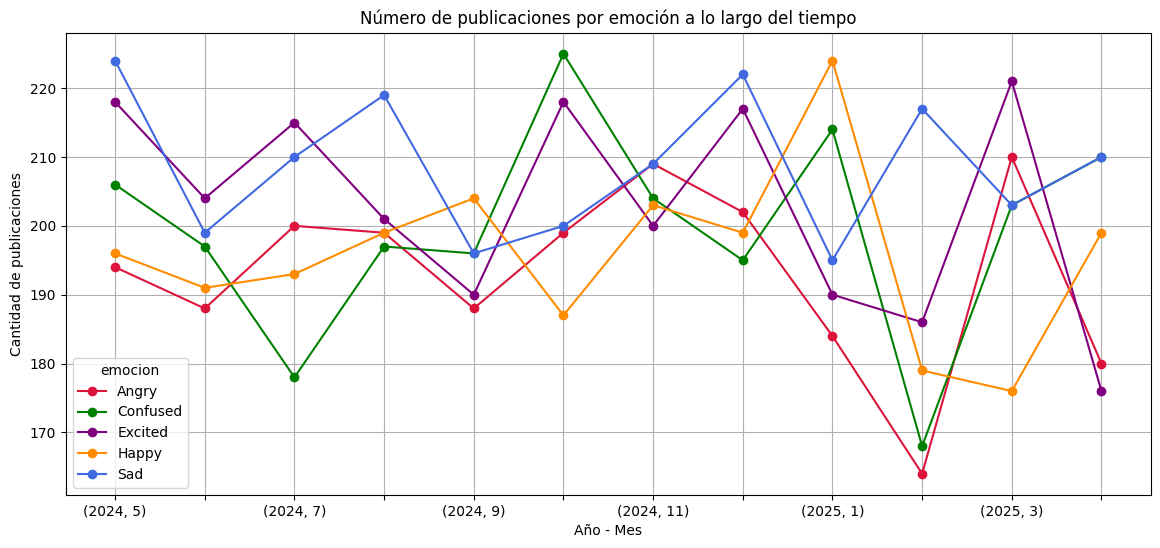

In [7931]:
emocion_tiempo.plot(figsize=(14,6), marker='o', color=["crimson", "green", "purple", "darkorange", "royalblue"])
plt.title("Número de publicaciones por emoción a lo largo del tiempo")
plt.xlabel("Año - Mes")
plt.ylabel("Cantidad de publicaciones")
plt.grid(True)

plt.xticks(
    ticks=range(len(publicaciones_por_mes)), # Una marca por cada mes
)

plt.show()

En este gráfico podemos observar qué tipo de emociones tienen las publicaciones a lo largo del año.

Los meses más tristes son mayo, agosto y diciembre, más feliz enero, y más agresivo marzo. 

Esto nos será útil para personalizar los feeds de los usuarios, si un usuario solo entra a las redes para ver publicaciones felices y estamos en un mes con mayor índice de publicaciones tristes, trataremos de recomendarle las publicaciones felices disponibles, aunque sean antiguas.

### 6.6 Conclusiones: Toxicidad / Emociones / Mensajes

La toxicidad está muy presente en todos lados, y eso es algo negativo para la imagen de una red social.

Si queremos ser vistos como una red seria deberemos aplicar controles y normativas para que el porcentaje de toxicidad sea el mínimo posible.

Por otro lado, la longitud de los mensajes podría estar relacionada con el nivel de toxicidad de los mismos, pero al ser diferencias tan mínimas no podemos estar seguros.

### 6.7 Análisis a nivel España

Finalmente, realizaremos un análisis completo de lo visto anteriormente para tener un mejor punto de vista de los usuarios de España, que, como dijimos anteriormente, será el país donde lancemos la red social.

#### 6.7.1 Evolución de publicaciones por día de la semana en España

In [7932]:
# Filtramos por España y agrupamos por los días de la semana
publicaciones_dia_semana_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("dia_semana")
    .size()
    .reindex(dias_ordenados)  # Reordena según el orden que establecimos en la variable dias_ordenados
)

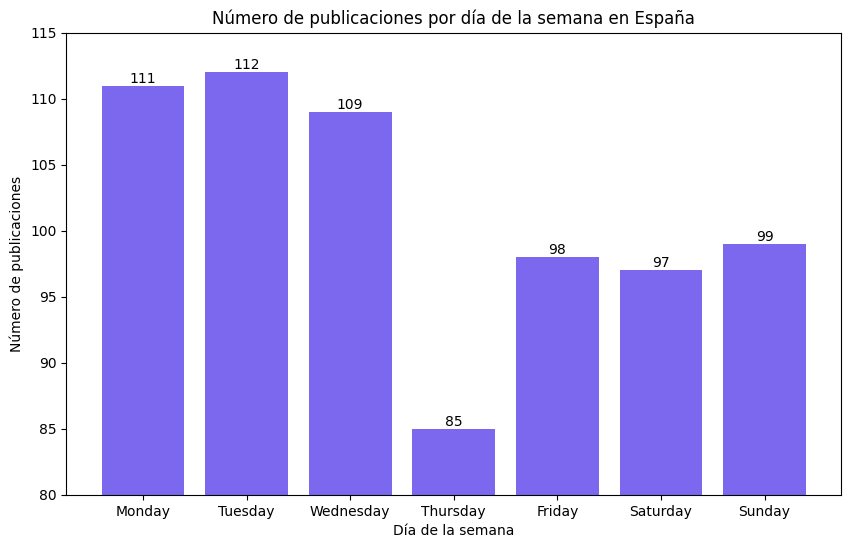

In [7933]:
# Gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(publicaciones_dia_semana_es.index, publicaciones_dia_semana_es.values, color="mediumslateblue")

plt.title("Número de publicaciones por día de la semana en España")
plt.xlabel("Día de la semana")
plt.ylabel("Número de publicaciones")

plt.bar_label(bars) # Valores encima de las barras
plt.ylim(80,115) # Ajustamos el eje "y" para poder ver con más detalle el gráfico

plt.show()

Al igual que a nivel global, entre semana se realizan más publicaciones que los fines de semana, exceptuando los jueves. Podemos concluir que la gente aprovecha los fines de semana para salir, y al no estar tanto tiempo en casa, no publican tanto en las redes.

#### 6.7.2 Distribución por plataforma (España)

##### Distribución de publicaciones por plataforma (España)

Como hicimos en el primer apartado, mediante los próximos 3 gráficos deseamos averiguar qué plataformas tienen mayor uso en España.

In [7934]:
# Contar publicaciones por plataforma en España
publicaciones_plataforma_es = (
    redSocial[redSocial["pais"] == "Spain"]["plataforma"]
    .value_counts()
)

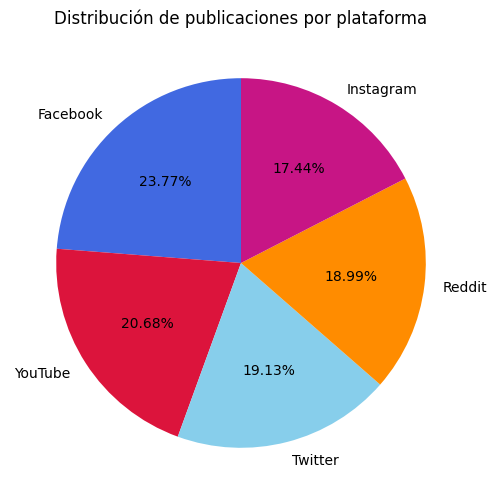

In [7935]:
# Diagrama de sectores
plt.figure(figsize=(6, 6))
plt.pie(
    publicaciones_plataforma_es.values,
    labels=publicaciones_plataforma_es.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=["royalblue", "crimson", "skyblue", "darkorange", "mediumvioletred"]
)

plt.title("Distribución de publicaciones por plataforma")
plt.show()

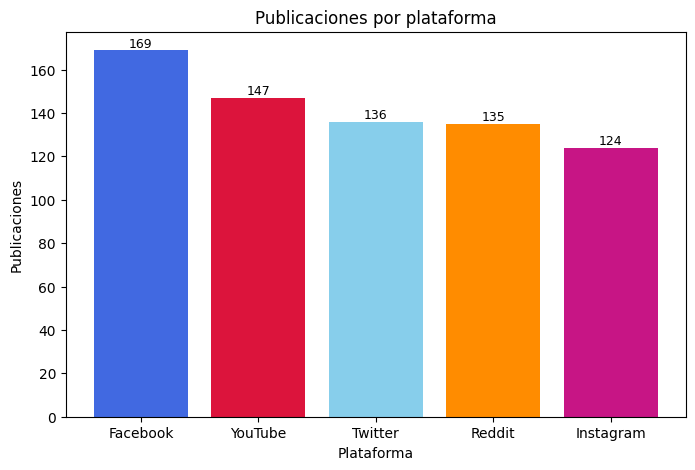

In [7936]:
# Gráfico de barras
plt.figure(figsize=(8,5))

bars = plt.bar(
    publicaciones_plataforma_es.index,
    publicaciones_plataforma_es.values,
    color=["royalblue", "crimson", "skyblue", "darkorange", "mediumvioletred"]
)

plt.bar_label(bars, fontsize=9) # Cantidad encima de cada barra

plt.title("Publicaciones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Publicaciones")

plt.show()

##### Distribución de visualizaciones por plataforma (España)

In [7937]:
# Sumar visualizaciones por plataforma en España
visualizaciones_plataforma_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("plataforma")["visualizaciones"]
    .sum()
    .sort_values(ascending=False)
)

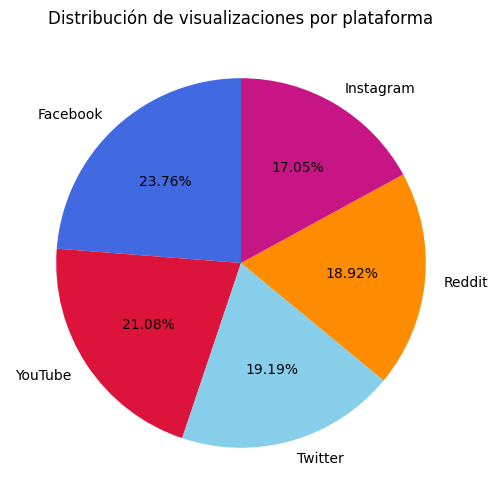

In [7938]:
# Diagrama de sectores
plt.figure(figsize=(6, 6))
plt.pie(
    visualizaciones_plataforma_es.values,
    labels=visualizaciones_plataforma_es.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=["royalblue", "crimson", "skyblue", "darkorange", "mediumvioletred"]
)

plt.title("Distribución de visualizaciones por plataforma")
plt.show()

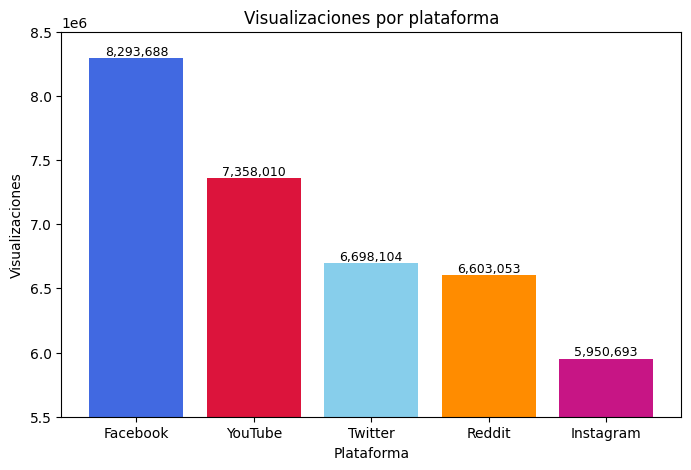

In [7939]:
# Gráfico de barras
plt.figure(figsize=(8,5))

bars = plt.bar(
    visualizaciones_plataforma_es.index,
    visualizaciones_plataforma_es.values,
    color=["royalblue", "crimson", "skyblue", "darkorange", "mediumvioletred"]
)

# Cantidad encima de cada barra
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Visualizaciones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Visualizaciones")
plt.ylim(5500000,8500000)

plt.show()

##### Distribución de interacciones por plataforma (España)

In [7940]:
# Sumar interacciones por plataforma en España
interacciones_plataforma_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("plataforma")["interacciones_totales"]
    .sum()
    .sort_values(ascending=False)
)

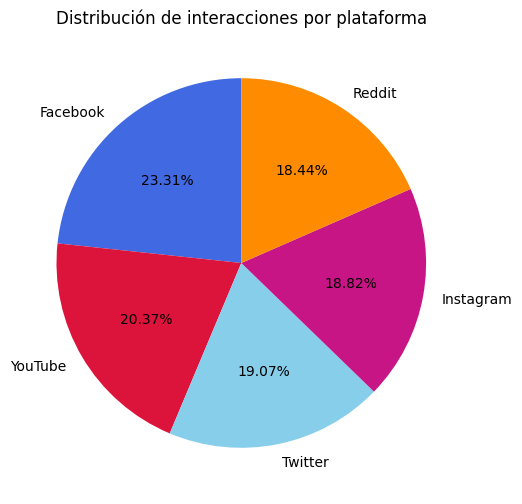

In [7941]:
# Diagrama de sectores
plt.figure(figsize=(6, 6))
plt.pie(
    interacciones_plataforma_es.values,
    labels=interacciones_plataforma_es.index,
    autopct='%1.2f%%', # Para que aparezca el porcentaje de cada plataforma
    startangle=90, # Para centrar el gráfico para que se vea mejor
    colors=["royalblue", "crimson", "skyblue", "mediumvioletred", "darkorange"]
)

plt.title("Distribución de interacciones por plataforma")
plt.show()

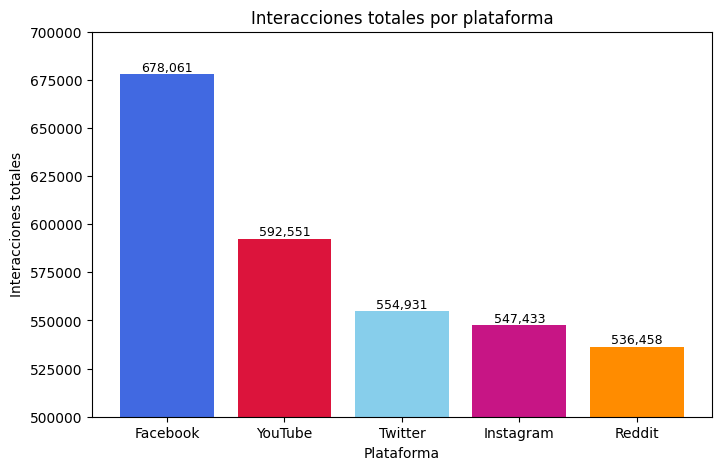

In [7942]:
# Gráfico de barras
plt.figure(figsize=(8,5))

bars = plt.bar(
    interacciones_plataforma_es.index,
    interacciones_plataforma_es.values,
    color=["royalblue", "crimson", "skyblue", "mediumvioletred", "darkorange"]
)

# Cantidad encima de cada barra
plt.bar_label(bars, fmt='{:,.0f}', fontsize=9)

plt.title("Interacciones totales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Interacciones totales")
plt.ylim(500000,700000)
plt.show()

A la hora de diseñar nuestra red, nos fijaremos en las redes que más se utilizan en España, siendo Facebook la más utilizada

#### 6.7.3 Interacciones totales vs visualizaciones por hora del día (España)

In [7943]:
# Agrupamos por hora calculando la media
metricas_hora_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("hora")[["interacciones_totales", "visualizaciones"]]
    .mean()
)

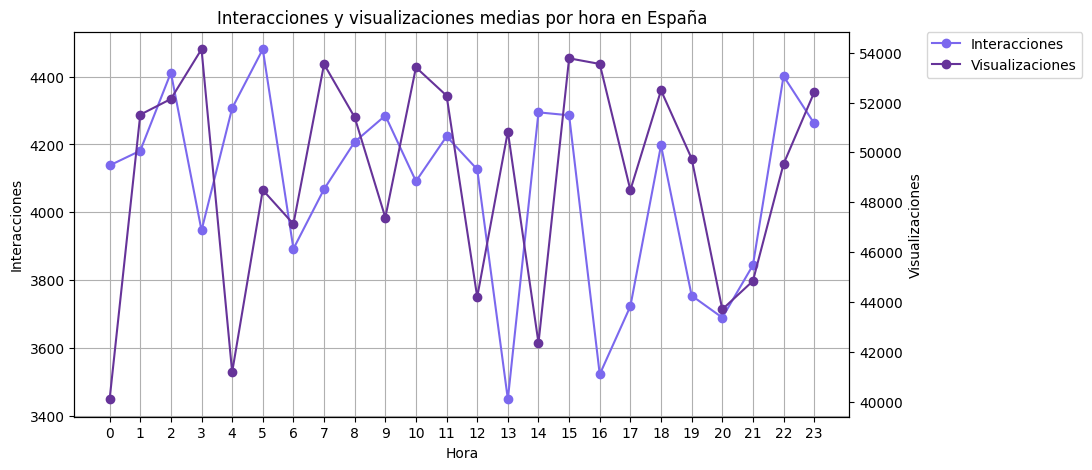

In [7944]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Interacciones (eje izquierdo)
linea1 = ax1.plot(
    metricas_hora_es.index,
    metricas_hora_es["interacciones_totales"],
    marker='o',
    color="mediumslateblue",
    label="Interacciones"
)
ax1.set_xlabel("Hora")
ax1.set_ylabel("Interacciones")
ax1.set_xticks(range(24))
ax1.grid(True)

# Visualizaciones (eje derecho)
ax2 = ax1.twinx()  # Usamos twinx para mostrar dos gráficos de líneas de diferentes escalas juntos
linea2 = ax2.plot(
    metricas_hora_es.index,
    metricas_hora_es["visualizaciones"],
    marker='o',
    color="rebeccapurple",
    label="Visualizaciones"
)
ax2.set_ylabel("Visualizaciones")

# Leyenda conjunta
lineas = linea1 + linea2
labels = [l.get_label() for l in lineas] # Tomamos las etiquetas de las lineas
ax1.legend(lineas, labels, loc="center", bbox_to_anchor=(1.2, 0.94)) # Añadimos las lineas y etiquetas, y colocamos la leyenda en una buena zona

plt.title("Interacciones y visualizaciones medias por hora en España")
plt.show()


En este gráfico podemos observar las horas en las que hay más actividad con los posts en España. En este caso las 02:00 y las 23:00 serían las horas con mejor relación entre interacciones y visualizaciones.

#### 6.7.4 Interacciones totales vs visualizaciones por franja horaria (España)

In [7945]:
# Agrupamos por franja y sumamos interacciones y visualizaciones
metricas_franja_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]]
    .sum()
)

C:\Users\Asier\AppData\Local\Temp\ipykernel_15016\3960146830.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("franja_horaria")[["interacciones_totales", "visualizaciones"]]


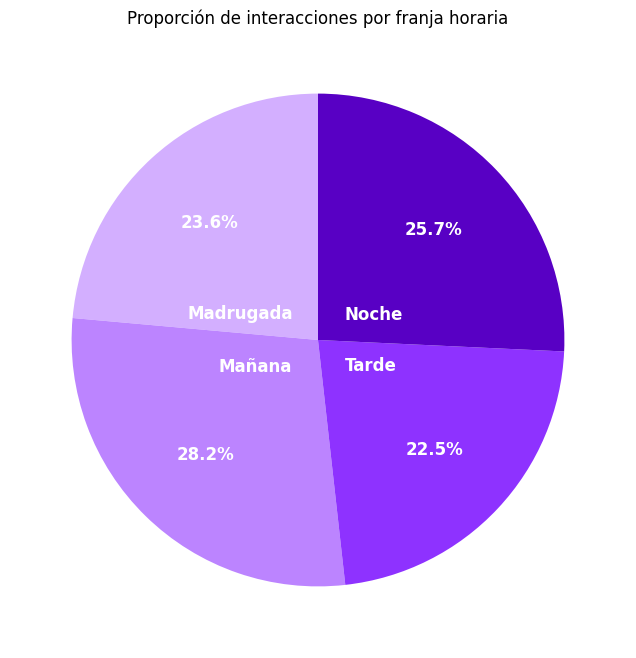

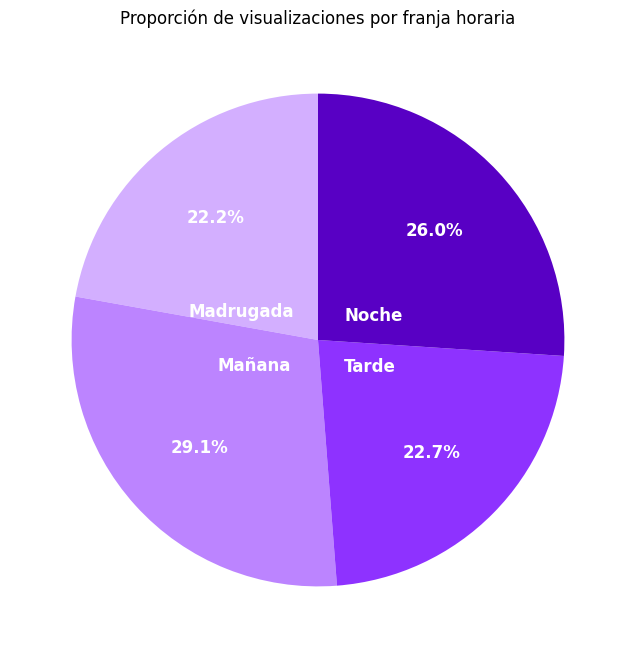

In [7946]:
# Diagrama de sectores para interacciones
plt.figure(figsize=(8,8))
plt.pie(
    metricas_franja_es ["interacciones_totales"],
    labels=metricas_franja_es.index,
    autopct='%1.1f%%', # Para que aparezca el porcentaje
    pctdistance=0.65,   # Porcentajes fuera del pastel
    labeldistance=0.15,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90, # Para que esté centrado
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)
plt.title("Proporción de interacciones por franja horaria")
plt.show()

# Diagrama de sectores para visualizaciones
plt.figure(figsize=(8,8))
plt.pie(
    metricas_franja_es["visualizaciones"],
    labels=metricas_franja_es.index,
    autopct='%1.1f%%',
    pctdistance=0.65,   # Porcentajes fuera del pastel
    labeldistance=0.15,  # Etiquetas cerca del borde
    colors=["#D3AFFF", "#BC84FF", "#8E32FF", "#5800C4"],
    startangle=90,
    textprops={'color':"white", 'fontweight':'bold', 'fontsize':'12'}
)
plt.title("Proporción de visualizaciones por franja horaria")
plt.show()

Si tuviéramos que realizar por ejemplo un mantenimiento, priorizaríamos las franjas en las que menos usuarios están activos en España (Madrugada>Tarde>Noche>Mañana).

#### 6.7.5 Marcas (España)

##### Marcas con mayor tasa de compromiso (España)

In [7947]:
# Agrupamos marcas por tasa de compromiso
media_marcas_tasa_compromiso_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("nombre_marca")["tasa_compromiso"]
    .mean() # Calculamos la media
    .sort_values(ascending=True)
)

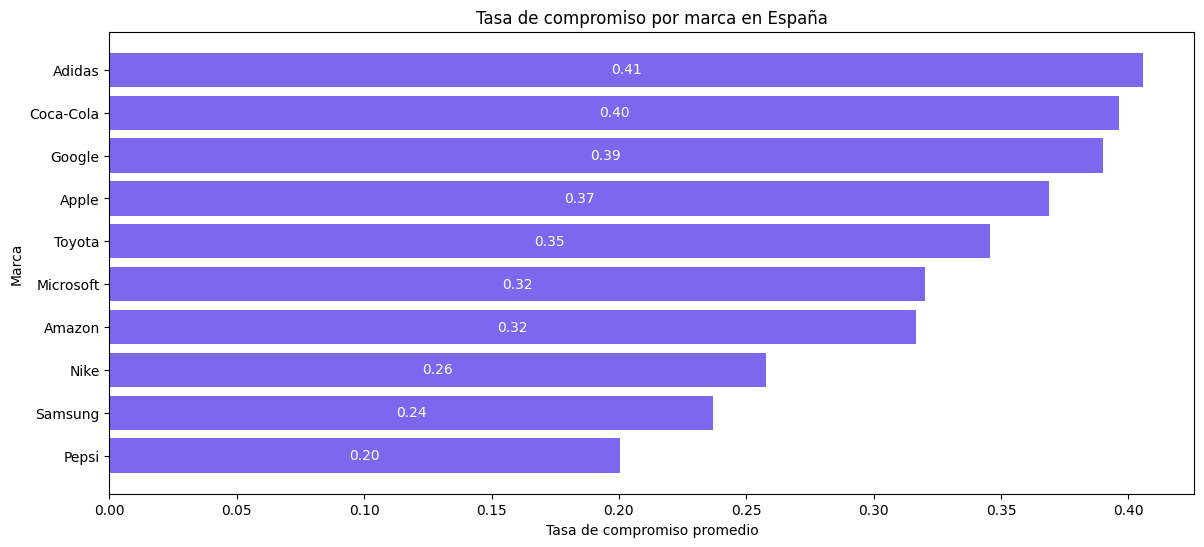

In [7948]:
# Gráfico de barras
plt.figure(figsize=(14,6))

bars = plt.barh(
    media_marcas_tasa_compromiso_es.index,
    media_marcas_tasa_compromiso_es.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por marca en España")
plt.xlabel("Tasa de compromiso promedio")
plt.ylabel("Marca")

# Valores dentro de las barras
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.2f}') 

plt.show()

Si tuviéramos la oportunidad de promocionar o colaborar con alguna marca en nuestra red, esas serían las principales candidatas.

##### Mediana de marcas por tasa de compromiso (España)

Con el siguiente gráfico pretendemos ver cual de las anteriores marcas quedan evitando outliers.

In [7949]:
# Agrupamos marcas por tasa de compromiso
mediana_marcas_tasa_compromiso_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("nombre_marca")["tasa_compromiso"]
    .median() # Calculamos la mediana
    .sort_values(ascending=True)
)

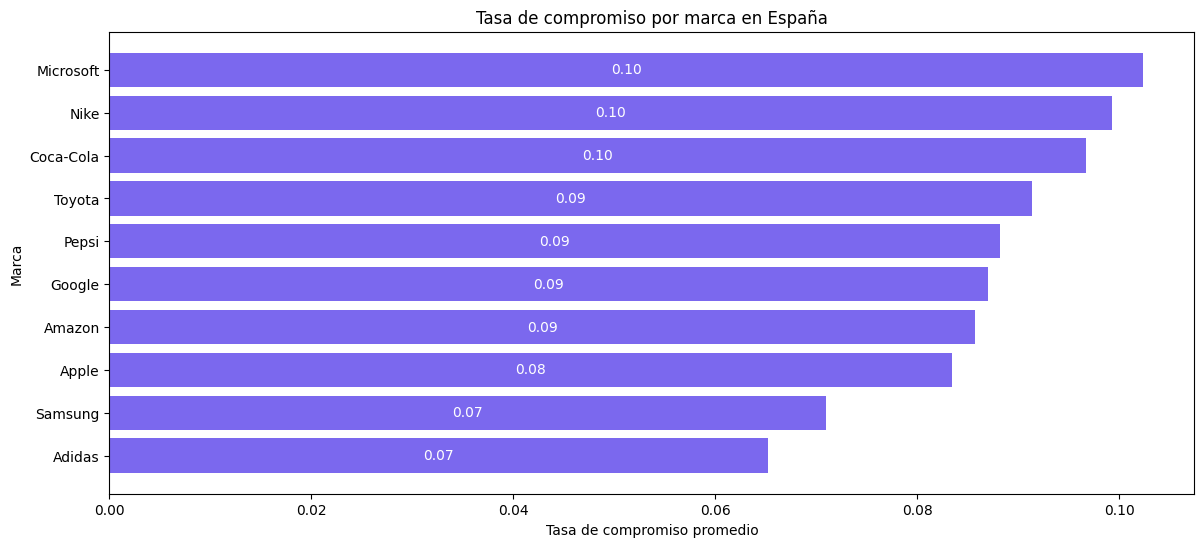

In [ ]:
# Gráfico de barras
plt.figure(figsize=(14,6))

bars = plt.barh(
    mediana_marcas_tasa_compromiso_es.index,
    mediana_marcas_tasa_compromiso_es.values,
    color="mediumslateblue"
)

plt.title("Mediana de tasa de compromiso por marca en España")
plt.xlabel("Tasa de compromiso mediana")
plt.ylabel("Marca")

# Valores dentro de las barras
plt.bar_label(bars, label_type='center', color="white", fmt='{:,.2f}') 

plt.show()

Calculando la mediana volvemos a ver a Microsoft en primer lugar, que era la marca con mayor tasa de compromiso promedia a nivel global.

#### 6.7.6 Productos (España)

##### Productos con mayor tasa de compromiso (España)

In [7951]:
# Agrupamos productos por tasa de compromiso
media_productos_tasa_compromiso_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("nombre_producto")["tasa_compromiso"]
    .mean() # Calculamos la media
    .sort_values(ascending=False)
    .head(10)
)

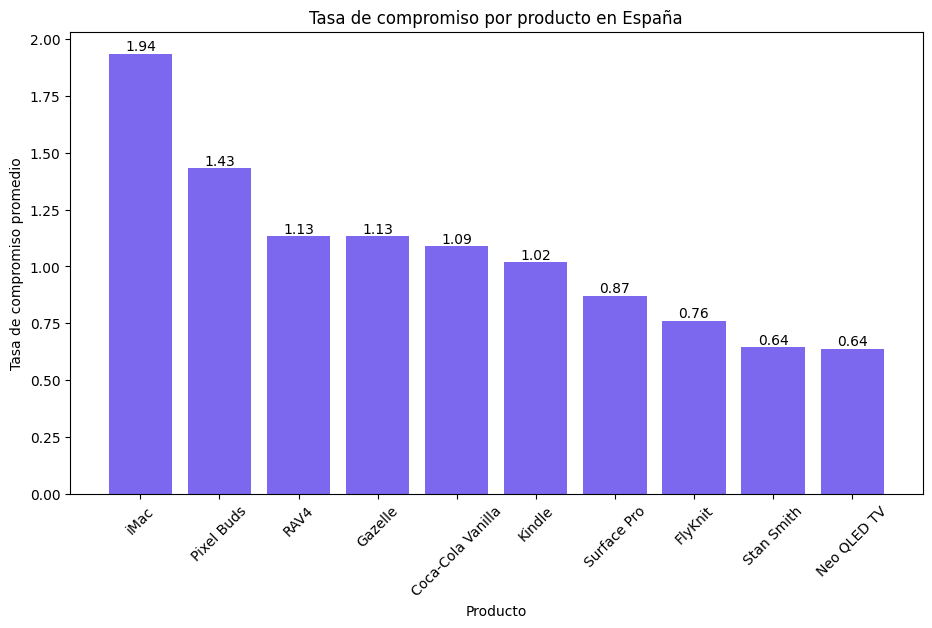

In [7952]:
plt.figure(figsize=(11,6))

bars = plt.bar(
    media_productos_tasa_compromiso_es.index,
    media_productos_tasa_compromiso_es.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por producto en España")
plt.xlabel("Producto")
plt.ylabel("Tasa de compromiso promedio")


# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.2f}')

# Rotar nombres para que se lean bien
plt.xticks(rotation=45)

plt.show()

Estas tasas de compromiso están demasiado por encima de lo normal, iMac llegando casi al 200%. Podemos confirmar que está plagado de outliers.

##### Mediana de productos por tasa de compromiso (España)

Con el siguiente gráfico pretendemos ver cual de los anteriores productos quedan evitando outliers.

In [7953]:
# Agrupamos productos por tasa de compromiso
mediana_productos_tasa_compromiso_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("nombre_producto")["tasa_compromiso"]
    .median() # Calculamos la mediana
    .sort_values(ascending=False)
    .head(10)
)

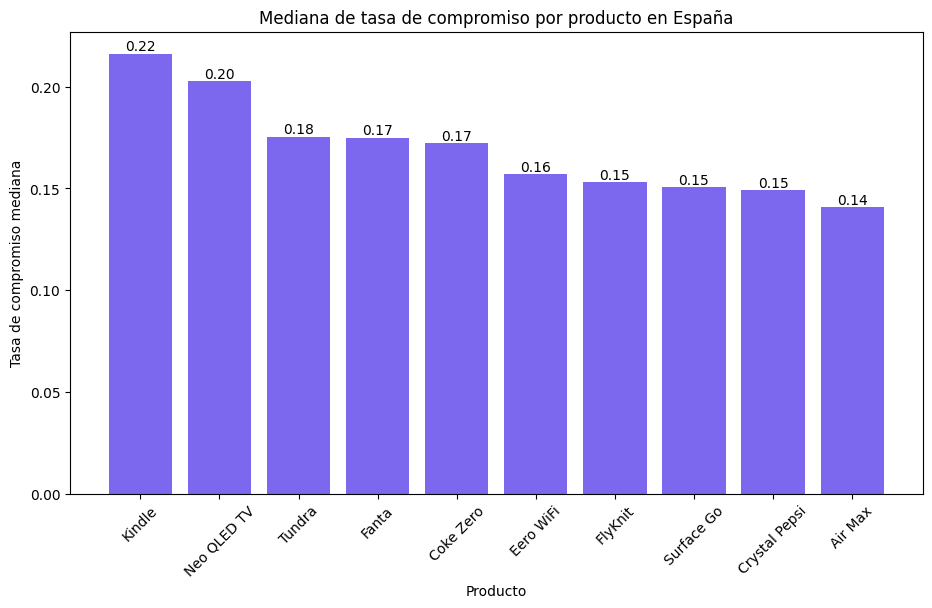

In [7954]:
# Gráfico de barras
plt.figure(figsize=(11,6))

bars = plt.bar(
    mediana_productos_tasa_compromiso_es.index,
    mediana_productos_tasa_compromiso_es.values,
    color="mediumslateblue"
)

plt.title("Mediana de tasa de compromiso por producto en España")
plt.xlabel("Producto")
plt.ylabel("Tasa de compromiso mediana")


# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.2f}')

# Rotar nombres para que se lean bien
plt.xticks(rotation=45)

plt.show()

Algunas publicaciones de iMac tienen interacciones exageradas respecto a visualizaciones.

#### 6.7.7 Categorías (España)

##### Categorías con mayor tasa de compromiso (España)

In [7955]:
# Agrupamos categorias por tasa de compromiso
media_categoria_tasa_compromiso_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("categoria_tema")["tasa_compromiso"]
    .mean() # Calculamos media
    .sort_values(ascending=False)
)

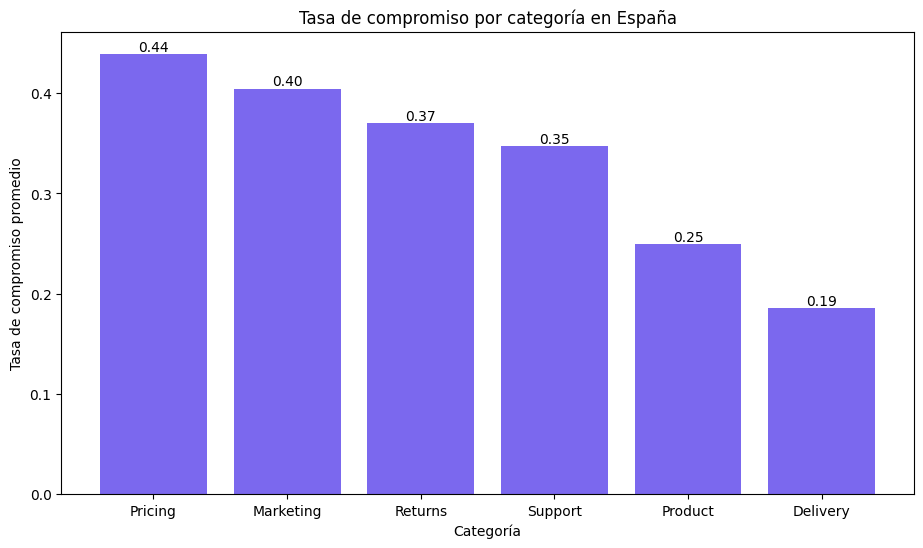

In [7956]:
# Gráfico de barras
plt.figure(figsize=(11,6))

bars = plt.bar(
    media_categoria_tasa_compromiso_es.index,
    media_categoria_tasa_compromiso_es.values,
    color="mediumslateblue"
)

plt.title("Tasa de compromiso por categoría en España")
plt.xlabel("Categoría")
plt.ylabel("Tasa de compromiso promedio")


# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.2f}')

plt.show()

En España el servicio de reparto no tiene tanto impacto como a nivel global, por eso profundizaremos primero en las demás.

##### Mediana de categorías tasa de compromiso (España)

Con el siguiente gráfico pretendemos ver cual de las anteriores categorías quedan evitando outliers.

In [7957]:
# Agrupamos categorias por tasa de compromiso
mediana_categoria_tasa_compromiso_es = (
    redSocial[redSocial["pais"] == "Spain"]
    .groupby("categoria_tema")["tasa_compromiso"]
    .median() # Calculamos mediana
    .sort_values(ascending=False)
)

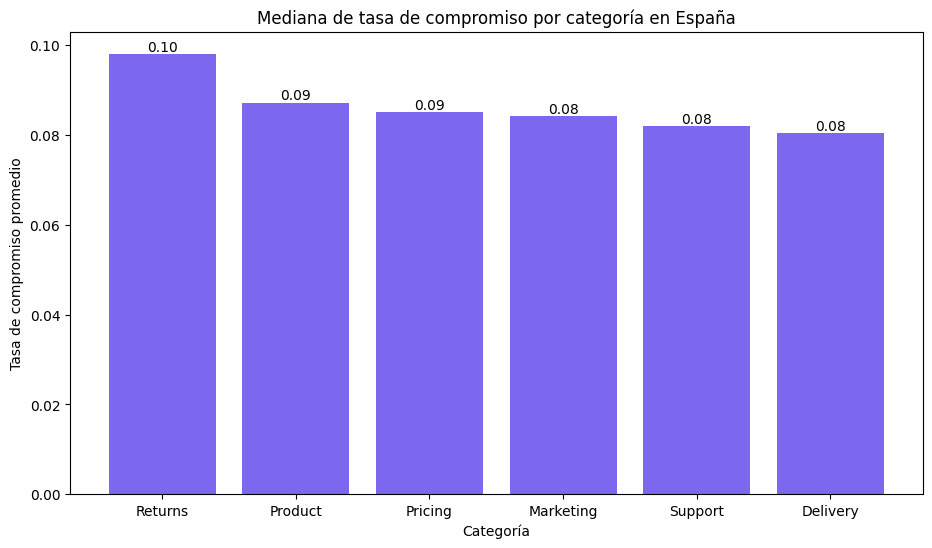

In [ ]:
# Gráfico de barras
plt.figure(figsize=(11,6))

bars = plt.bar(
    mediana_categoria_tasa_compromiso_es.index,
    mediana_categoria_tasa_compromiso_es.values,
    color="mediumslateblue"
)

plt.title("Mediana de tasa de compromiso por categoría en España")
plt.xlabel("Categoría")
plt.ylabel("Tasa de compromiso mediana")


# Valores encima de las barras
plt.bar_label(bars, fmt='{:,.2f}')

plt.show()

En España tampoco se encuentran muchos outliers en las categorías.

### 6.8 Conclusiones: Análisis a nivel España

Después de este profundo análisis, hemos sido capaces de averiguar las horas, plataformas, contenidos y marcas más frecuentadas por los usuarios en España, lo cual nos será muy útil a la hora de desarrollar nuestra red social.

Algunos de los datos a destacar de España serían los siguientes:
- Entre semana se realizan más publicaciones que los fines de semana
- Horas de mayor uso: 02:00 y 23:00
- Franja horaria de mayor uso: Mañana (06:00 - 11:00)
- Plataforma más utilizada: Facebook
- Algunas publicaciones de iMac tienen muchas más interacciones respecto a visualizaciones (outliers)
